# Homework - Stage 1

##  Byte Benders - TIM 7

Alvin Arianda

Cut Sari Natasya

Dwi Damara Kartikasari

Limatan Luviar

Muhammad Hadi Dermawan

Nofri Rhamawati

Sulami Hauzana Assyifa

# Descripton and Background Data

- **Context**
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

- **Content**
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.
- Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
- Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

- **Inspiration**
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

- **Tasks to Solve** :
- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

**About this file** 

"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

1. CustomerID
Unique customer ID
2. ProdTaken
Unique customer ID
3. Age
Age of customer
4. TypeofContact
How customer was contacted (Company Invited or Self Inquiry)
5. CityTier
City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch
Duration of the pitch by a salesperson to the customer
7. Occupation
Occupation of customer
8. Gender
Gender of customer
9. NumberOfPersonVisiting
Total number of persons planning to take the trip with the customer
10. NumberOfFollowups
Total number of follow-ups has been done by the salesperson after the sales pitch
11. ProductPitched
Product pitched by the salesperson
12. PreferredPropertyStar
Preferred hotel property rating by customer
13. MaritalStatus
Marital status of customer
14. NumberOfTrips
Average number of trips in a year by customer
15. Passport
The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore
Sales pitch satisfaction score
17. OwnCar
Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting
Total number of children with age less than 5 planning to take the trip with the customer
19. Designation
Designation of the customer in the current organization
20. MonthlyIncome
Gross monthly income of the customer

# Load And Describe Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
# sns.set(rc={'figure.figsize':(20.7,8.27)})
# sns.set_style("whitegrid")
# sns.color_palette("dark")
# plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('Travel.csv')

In [4]:
df.shape

(4888, 20)

In [5]:
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
476,200476,0,24.0,Self Enquiry,1,23.0,Salaried,Male,3,4.0,Basic,4.0,Divorced,2.0,0,3,1,1.0,Executive,17127.0
795,200795,0,37.0,Self Enquiry,3,16.0,Salaried,Female,2,4.0,Deluxe,3.0,Married,3.0,1,4,0,0.0,Manager,21694.0
2050,202050,0,35.0,Self Enquiry,3,14.0,Salaried,Female,3,3.0,Basic,3.0,Married,2.0,0,3,1,2.0,Executive,17572.0
4798,204798,0,41.0,Self Enquiry,3,17.0,Large Business,Female,3,5.0,Deluxe,4.0,Married,2.0,0,5,1,2.0,Manager,25530.0
205,200205,1,29.0,Self Enquiry,3,33.0,Small Business,Female,2,3.0,Standard,3.0,Divorced,2.0,0,3,1,1.0,Senior Manager,22639.0


# Descriptive Statistics

### Cek tipe data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Describe

In [7]:
df.select_dtypes(include='number').describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


## Check nilai null

In [8]:
df.isna().sum()
for i in df.columns:
    print(f'Missing value pada kolom {i} sebanyak {(df[i].isna().sum())}, dengan persentase {round(((df[i].isna().sum())/(len(df))*100),2)}%')

Missing value pada kolom CustomerID sebanyak 0, dengan persentase 0.0%
Missing value pada kolom ProdTaken sebanyak 0, dengan persentase 0.0%
Missing value pada kolom Age sebanyak 226, dengan persentase 4.62%
Missing value pada kolom TypeofContact sebanyak 25, dengan persentase 0.51%
Missing value pada kolom CityTier sebanyak 0, dengan persentase 0.0%
Missing value pada kolom DurationOfPitch sebanyak 251, dengan persentase 5.14%
Missing value pada kolom Occupation sebanyak 0, dengan persentase 0.0%
Missing value pada kolom Gender sebanyak 0, dengan persentase 0.0%
Missing value pada kolom NumberOfPersonVisiting sebanyak 0, dengan persentase 0.0%
Missing value pada kolom NumberOfFollowups sebanyak 45, dengan persentase 0.92%
Missing value pada kolom ProductPitched sebanyak 0, dengan persentase 0.0%
Missing value pada kolom PreferredPropertyStar sebanyak 26, dengan persentase 0.53%
Missing value pada kolom MaritalStatus sebanyak 0, dengan persentase 0.0%
Missing value pada kolom NumberOfT

## Check nilai duplicates

In [9]:
print('There is',df.duplicated().sum(),'duplicated value')

There is 0 duplicated value


## Pendekatan Numerik

In [10]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

# Explatory Data Analysis

In [11]:
# df_raw = df.copy()

### Kategorikal dan Numerikal

In [12]:
nums = df.select_dtypes(exclude='object').columns.tolist()
cats = df.select_dtypes(include='object').columns.tolist()

In [13]:
df[nums].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [14]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


- Semua tipe data sudah sesuai
- Terdapat kolom dengan nilai null, yaitu `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan `MonthlyIncome` dengan nilai null terbanyak ada pada kolom DurationOfPitch yaitu 5.14% dari total baris.
- NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar, dan MonthlyIncome memiliki perbedaan nilai mean dan median yang cukup tinggi dan pada Gender terdapat 3 unique value
- terdapat outlier pada kolom `DurationOfPitch` dan `NumberofTrips` karena nilai max sangan jauh dari nilai Q3-nya.

## Univariate Analysis

### ProdTaken

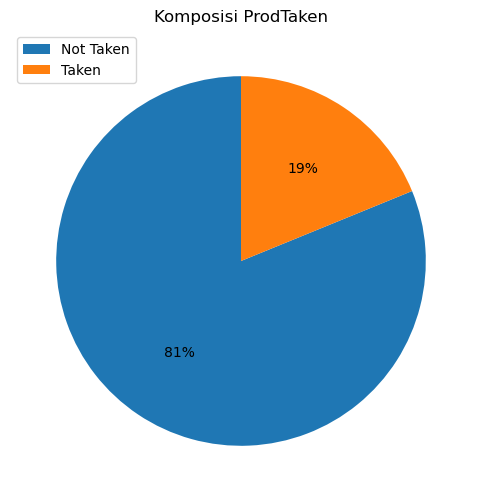

In [15]:
plt.figure(figsize=(6, 6))
target_counts = df['ProdTaken'].value_counts()
plt.pie(target_counts, autopct='%1.0f%%', startangle=90)
plt.title('Komposisi ProdTaken')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

In [16]:
target_pt = (df[['ProdTaken']]
            .groupby('ProdTaken')
            .agg(Count=('ProdTaken','count'))
            .sort_values(by=["Count"], ascending=False)
            .reset_index()
            )
target_pt

,ProdTaken,Count
0,0,3968
1,1,920


Terdapat sekitar 81.18% yang tidak mengambil Wellness Tourism Package yang setara dengan 3968 Customer dengan ProdTaken = 0. sementara hanya 18.82% pelanggan yang mengambil Wellness Tourism Package yang setara dengan 920 Customer dengan ProdTaken = 1. ini mengindikasikan bahwa Wellness Tourism Package kurang diminati oleh customer.

Hal ini menandakan adanya imbalance data pada target, dan akan dilakukan undersampling

### Numerikal

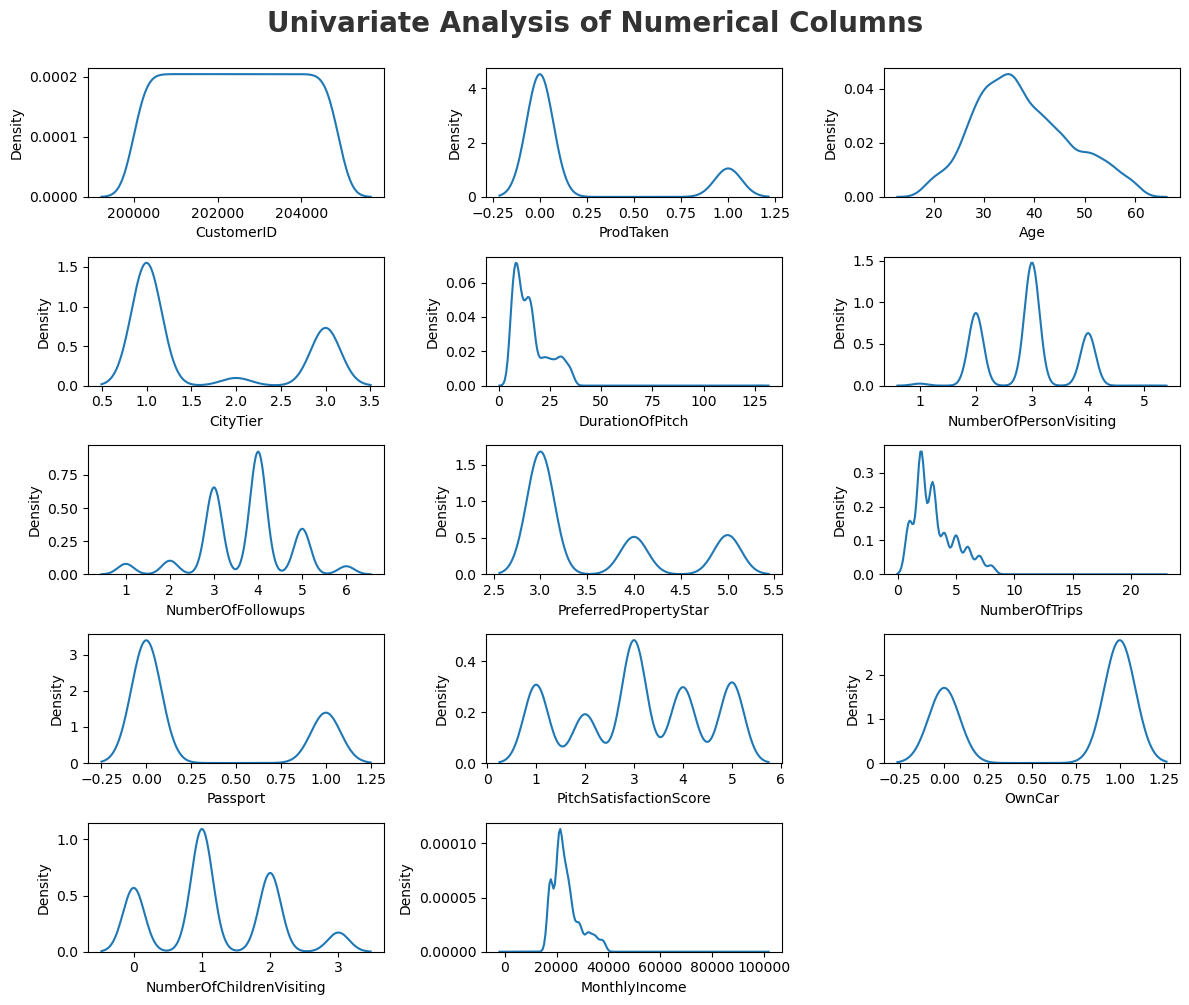

In [17]:
num = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
plt.figure(figsize=(12, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE dan Box plot untuk setiap kolom numerikal
for i, col in enumerate(nums):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[col])
    plt.xlabel(col)
plt.tight_layout()
plt.show()


Kesimpulan:

- Kolom CustomerID memiliki sebaran data yang terlalu banyak sehingga kolom tersebut bisa dihapus nantinya.
- Kolom Age memiliki distribusi yang hampir normal.
- Kolom DurationOfPitch, NumberOfTrips, dan MonthlyIncome sepertinya memiliki distribusi data positive skewed yang mengindikasikan terdapat outlier.
- kolom lain yang sisanya termasuk jenis data diskrit atau ordinal.

### Kategorikal

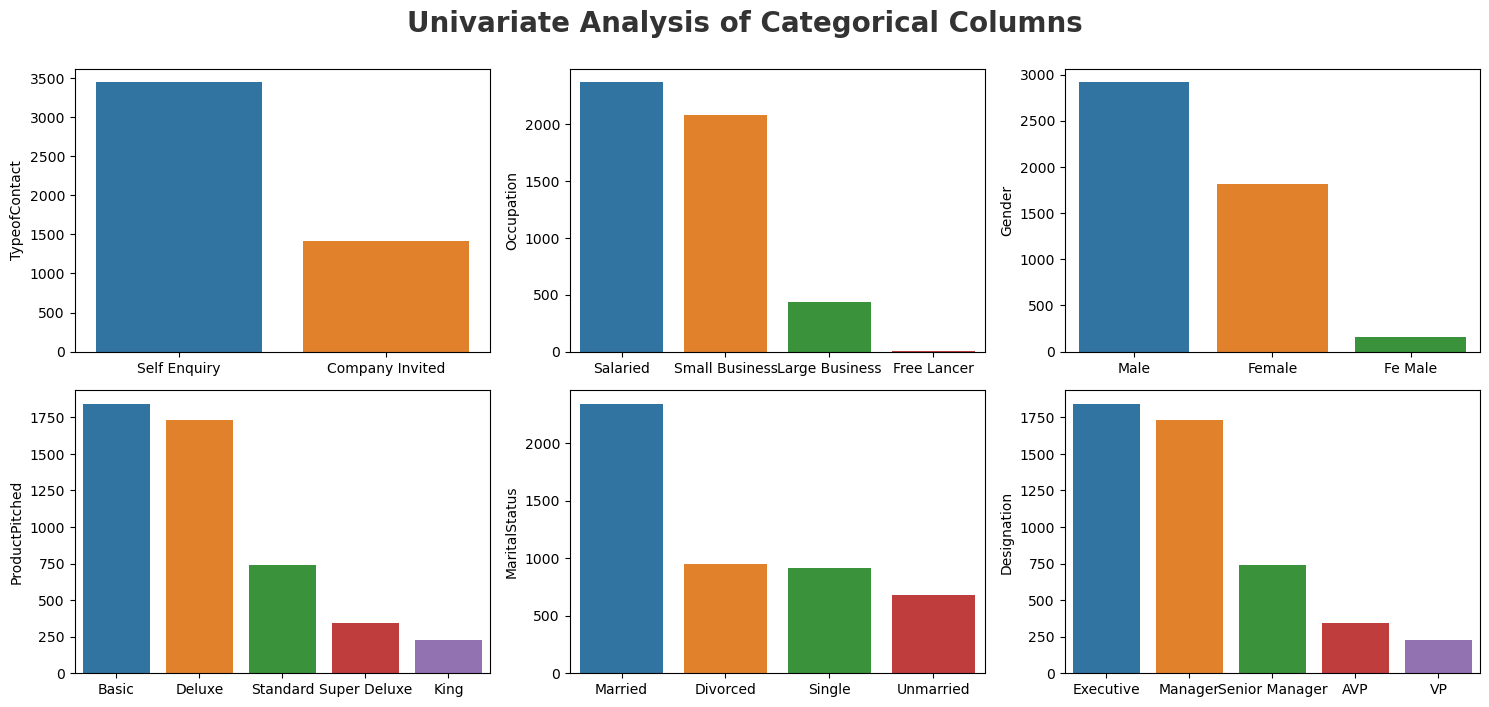

In [18]:
cat = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.barplot(x=df[cats[i]].value_counts().index, y=df[cats[i]].value_counts())

plt.tight_layout()
plt.show()


Kesimpulan:

- Pada kolom `TypeofContact` didominasi oleh self enquiry dengan proporsi lebih dari 50%
- Pada kolom `Occupation`  didominasi oleh dua kategori yaitu Salaried dan Small Business
- Pada kolom `Gender` jenis kelamin laki-laki lebih banyak dari perempuan, selain itu nilain Fe Male dapat diubah menjadi female
- Pada kolom `ProductPitched` didominasi oleh 2 kategori yaitu Deluxe dam basic
- Pada kolom `MaritalStatus` didominasi oleh Married, dan nilai Unmarried dapat diubah menjadi Single karena memiliki arti yang sama
-  pada kolom `Designation` didominasi oleh 2 kategori yaitu Manager dan Executive

## Bivariate Analysis

In [19]:
df_raw = df.copy()

In [20]:
df_raw['ProdTaken_YN'] = df_raw['ProdTaken'].apply(lambda x: 'Yes' if x == 1 else 'No')

### Cats Vs ProdTaken

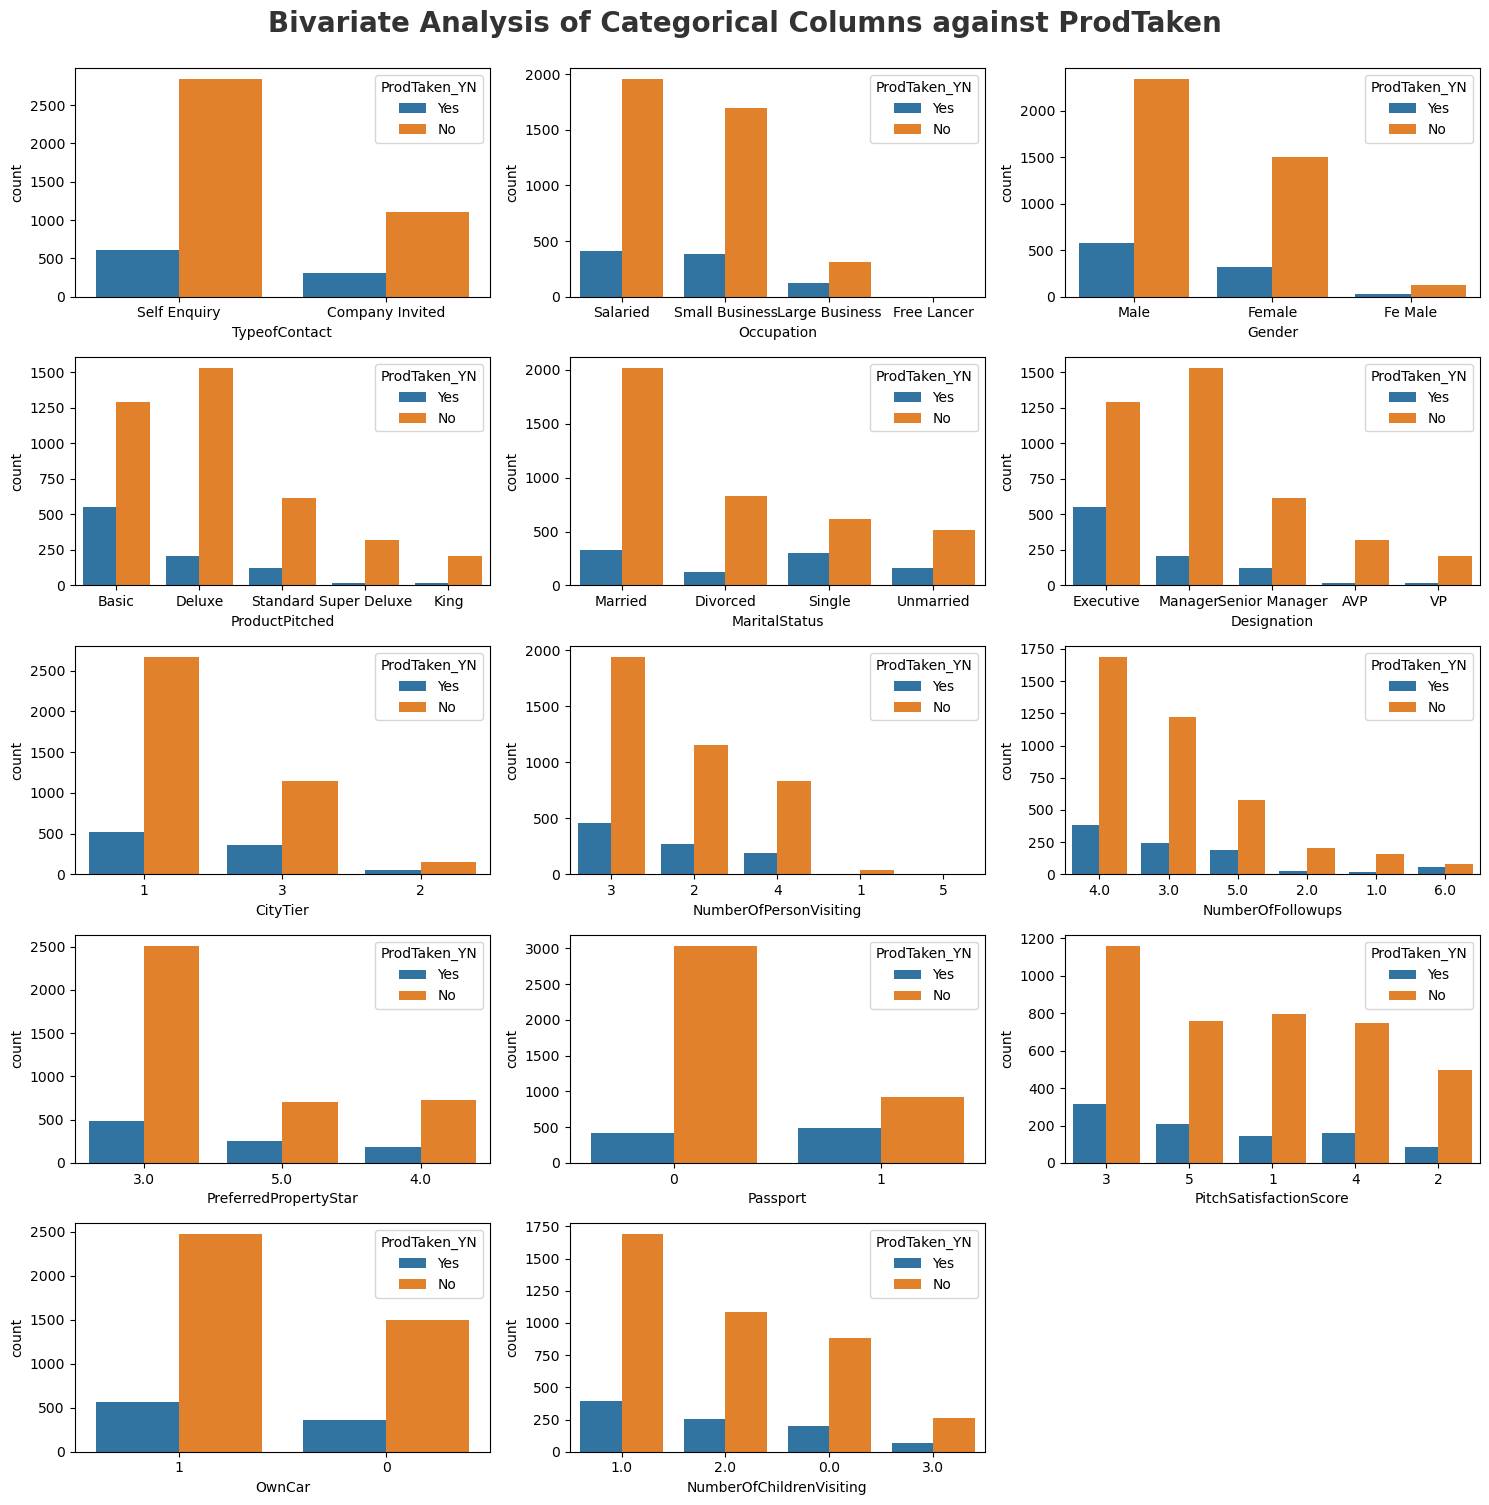

In [21]:
cat = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']

plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Categorical Columns against ProdTaken', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat)):
    plt.subplot(5, 3, i+1)
    sorted_vals = df_raw[cat[i]].value_counts().index
    sns.countplot(x=df_raw[cat[i]], hue=df_raw['ProdTaken_YN'], order=sorted_vals)

plt.tight_layout()
plt.show()


Berdasarkan Visualisasi diatas dapat disimpulkan bahwa:
- Customer dengan tipe kontrak Self Enquiry membeli paket lebih banyak daripada customer dengan tipe kontrak Company Invited
- Customer yang berada di city tier 3 memiliki persentase pembelian paket lebih tinggi setelah ditawarkan oleh sales
- Customer dengan Occupation Salaried dan Small Business memiliki ketertarikan untuk membeli paket yang ditawarkan
- Customer dengan gender Male lebih banyak mengambil paket yang ditawarkan daripada female atau fe male
- Distribusi jumlah orang yang ikut dalam perjalanan dengan customer yang mengambil penawaran paket travel paling banyak adalah 3 orang
- Customner yang di-follow up antara 3-5 kali lebih banyak yang mengambil penawaran travel dibandingkan dengan yang ditawarkan kurang dari 3 kali atau lebih dari 5 kali
- Product basic yang ditawarkan oleh sales lebih banyak diambil daripada produk lainnya
- Customer yang menerima penawaran paket travel lebih banyak memilih property bintang tiga dibanding bintang empat dan lima
- Customer dengan status single atau unmarried lebih banyak menerima penawaran paket travel
- Customer yang memiliki passport memiliki persentase menerima penawaran paket travel lebih tinggi daripada yang tidak memiliki passport
- Customer yang memberikan score kepuasan >=3 lebih banyak membeli paket perjalanan.
- Customer yang memiliki mobil lebih banyak menerima penawaran paket travel
- Customer dengan jumlah anak 1 lebih banyak menerima penawaran paket travel
- Customer dengan jabatan Executive lebih banyak menerima penawaran paket travel


In [22]:
#Uji Hipotesis menggunakan chisquare pada kolom kategorikal terhadap target
#H0 : Tidak berkorelasi dengan target
#H1 : Berkorelasi dengan target
from scipy.stats import chi2_contingency

chi2_check = []
for i in cat:  # Menggunakan variabel 'cat' yang merupakan list nama kolom kategorikal
    contingency_table = pd.crosstab(df_raw['ProdTaken'], df_raw[i])
    p_value = chi2_contingency(contingency_table)[1]
    
    if p_value < 0.05:
        chi2_check.append('H1 diterima: Berkorelasi dengan target')
    else:
        chi2_check.append('H0 diterima: Tidak berkorelasi dengan target')

result = pd.DataFrame(data=[cat, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result


,Column,Hypothesis Result
0,TypeofContact,H1 diterima: Berkorelasi dengan target
1,Occupation,H1 diterima: Berkorelasi dengan target
2,Gender,H0 diterima: Tidak berkorelasi dengan target
3,ProductPitched,H1 diterima: Berkorelasi dengan target
4,MaritalStatus,H1 diterima: Berkorelasi dengan target
5,Designation,H1 diterima: Berkorelasi dengan target
6,CityTier,H1 diterima: Berkorelasi dengan target
7,NumberOfPersonVisiting,H1 diterima: Berkorelasi dengan target
8,NumberOfFollowups,H1 diterima: Berkorelasi dengan target
9,PreferredPropertyStar,H1 diterima: Berkorelasi dengan target


Berdasarkan uji hipotesis diatas dapat disimpulkan bahwa kolom `Gender`, `OwnCar`, dan `NumberOfChildrenVisiting` tidak akan dimasukkan kedalam feature karena tidak berkorelasi dengan target (`ProdTaken`)

### Nums Vs ProdTaken

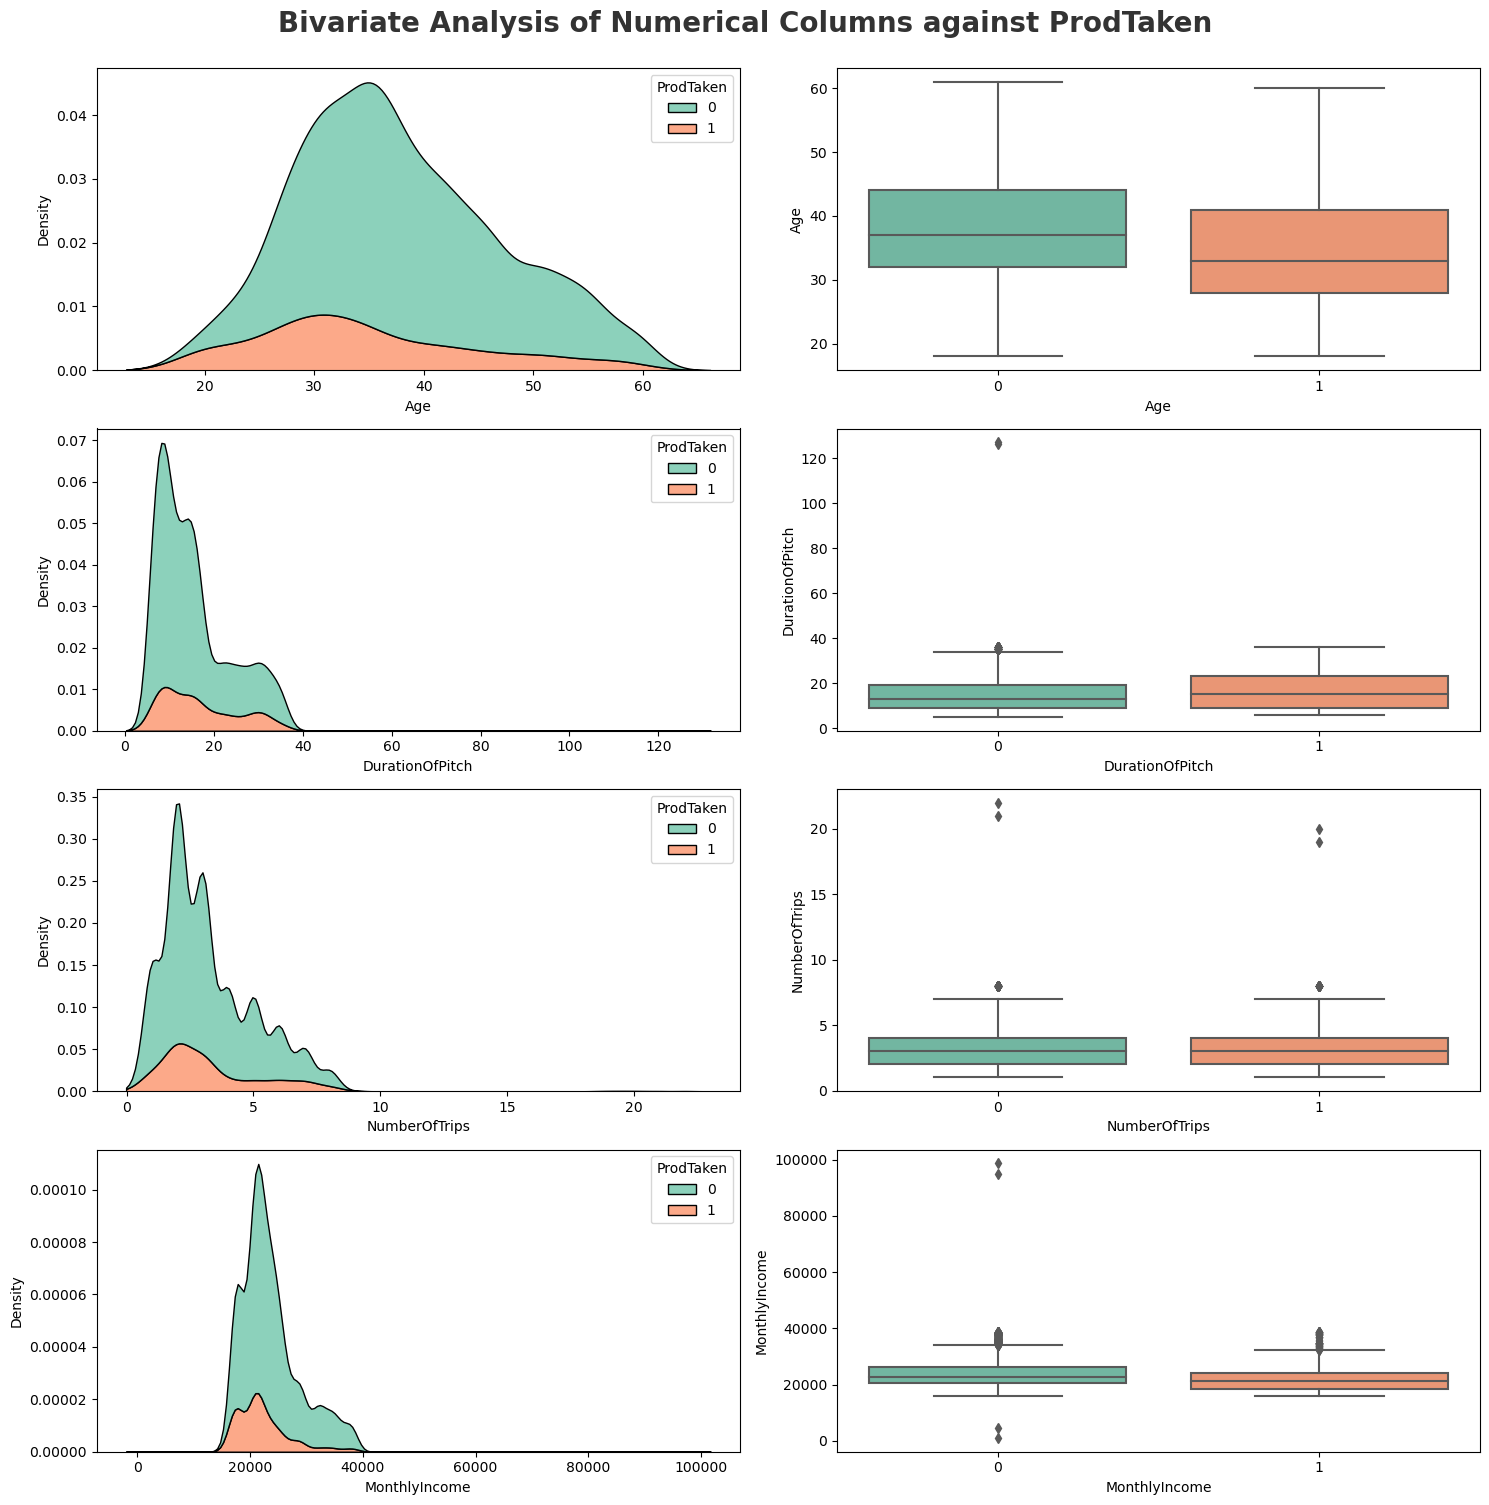

In [23]:
num = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Columns against ProdTaken', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE dan Box plot untuk setiap kolom numerikal dengan target 'ProdTaken'
for i, col in enumerate(num):
    plt.subplot(4, 2, 2*i+1)
    sns.kdeplot(data=df_raw, x=col, hue='ProdTaken', fill=True, multiple='stack', palette='Set2')
    plt.xlabel(col)
    
    plt.subplot(4, 2, 2*i+2)
    sns.boxplot(data=df_raw, x='ProdTaken', y=col, palette='Set2')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()


Berdasarkan hasil visualisasi diatas dapat disimpulkan bahwa:
- Umur customer yang membeli paket perjalanan berada pada retang 29-40 tahun
- Duration of pitch yang dilakukan sales selama kurang dari 20 menit akan meningkatkan kemungkinan customer mengambil paket perjalanan
- Customer dengan pendapatan bulanan sekitar 15000-25000 berkemungkinan lebih tertarik untuk membeli paket perjalanan
Customer yang membeli paket perjalanan tidak melelati lebih dari 5 kali perjalanan dalam satu tahun

In [24]:
# Menghitung korelasi antara fitur numerik dan target 'ProdTaken'
correlations = df_raw[num].apply(lambda x: x.corr(df_raw['ProdTaken']))
print(correlations)

Age               -0.147254
DurationOfPitch    0.078257
NumberOfTrips      0.018898
MonthlyIncome     -0.130585
dtype: float64


In [25]:
from scipy import stats
import pandas as pd

features = num  # Asumsikan num adalah list nama fitur numerik yang ingin diuji

results = []  # List untuk menyimpan hasil t-test

for feature in features:
    prod_taken_0 = df[df['ProdTaken'] == 0][feature]
    prod_taken_1 = df[df['ProdTaken'] == 1][feature]
    
    t_stat, p_value = stats.ttest_ind(prod_taken_0.dropna(), prod_taken_1.dropna())
    
    # Menentukan hasil uji t-test
    if p_value < 0.05: 
        hypothesis = f"H1 diterima: Ada perbedaan signifikan"
    else:
        hypothesis = "H0 diterima: Tidak cukup bukti untuk menolak hipotesis nol"
    
    results.append([feature, t_stat, p_value, hypothesis])

# Membuat DataFrame dari hasil t-test
result_df = pd.DataFrame(results, columns=['Feature', 't-statistic', 'p-value', 'Hypothesis Result'])
result_df

,Feature,t-statistic,p-value,Hypothesis Result
0,Age,10.162969,5.155096e-24,H1 diterima: Ada perbedaan signifikan
1,DurationOfPitch,-5.344214,9.516584e-08,H1 diterima: Ada perbedaan signifikan
2,NumberOfTrips,-1.302106,1.929435e-01,H0 diterima: Tidak cukup bukti untuk menolak h...
3,MonthlyIncome,8.984508,3.705260e-19,H1 diterima: Ada perbedaan signifikan


dari hasil uji t-test

Age: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa usia dapat memainkan peran penting dalam keputusan pembelian.

DurationOfPitch: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini mengindikasikan bahwa durasi presentasi memiliki pengaruh yang signifikan terhadap keputusan pembelian.

NumberOfTrips: Tidak cukup bukti untuk menolak hipotesis nol, yang berarti tidak ada perbedaan signifikan antara grup 'ProdTaken' terkait dengan jumlah perjalanan.

MonthlyIncome: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa pendapatan bulanan dapat memiliki pengaruh yang signifikan terhadap keputusan pembelian.

## Multivariate Analysis

### Heatmap Correlation

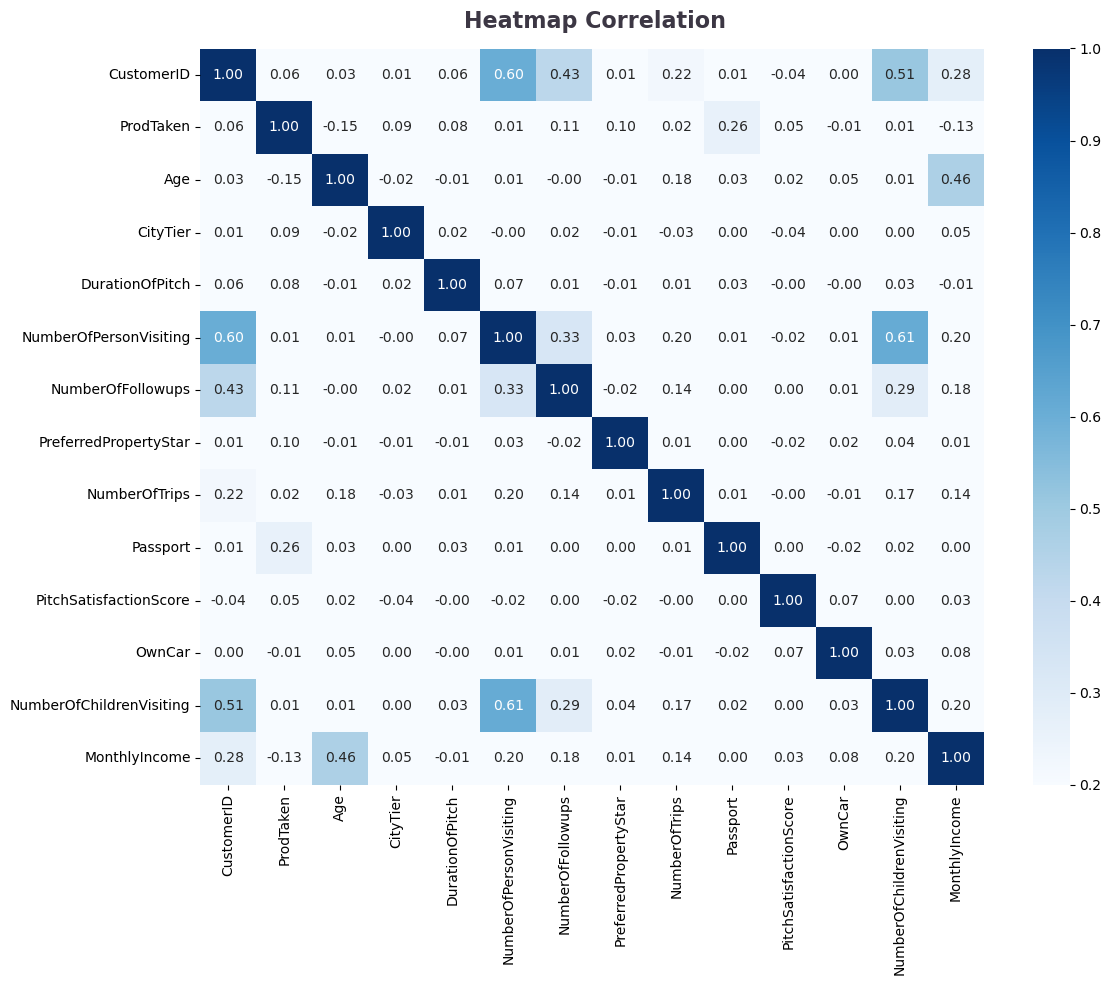

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df_raw.corr(), annot=True, fmt='.2f', cmap='Blues', vmin=0.2)
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

Berdasarakan visualisasi heatmap dapat diketahui bahwa:
- kolom target (`ProdTaken`) memiliki korelasi paling kuat dengan kolom Passport (0.26)
- kolom `NumberofPersonVisiting` dan kolom `NumberofChildrenVisiting` memiliki korelasi yang sangat tinggi (0.61) dan ada kemungkinan kolom tersebut redundant dan akan dipilih salah satu

In [27]:
df_cast = df_raw.copy()

#### Product mana yang diminati oleh pelanggan?

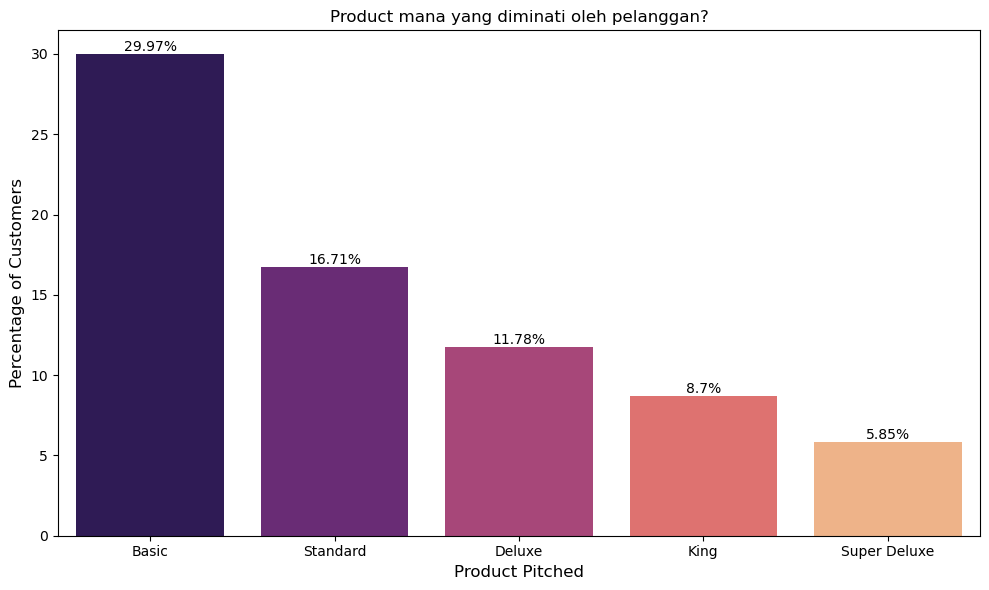

In [28]:
df_p = df_cast.groupby(['ProductPitched', 'ProdTaken_YN'])['CustomerID'].count().reset_index(name='TotalCustomer')\
.merge(df_cast.groupby(['ProductPitched'])['CustomerID'].count(),on ='ProductPitched')
df_p = df_p[df_p.ProdTaken_YN=='Yes'].reset_index(drop=True)
df_p['Perc']=round(df_p.TotalCustomer/df_p.CustomerID*100,2)
df_p = df_p.sort_values(by='Perc', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='ProductPitched', y='Perc', data=df_p, palette='magma')

for idx, value in enumerate(df_p['Perc']):
    plt.text(idx, value, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Product Pitched', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.title('Product mana yang diminati oleh pelanggan?')
plt.tight_layout()
plt.show()

Insight

produk dengan nama Basic memiliki jumlah pelanggan yang membeli tertinggi (552 pelanggan atau sekitar 29.97%). Ini menunjukkan bahwa produk Basic lebih diminati dibandingkan dengan produk lainnya dalam kategori ini.

Secara relatif, produk Basic memiliki tingkat konversi yang lebih tinggi dibandingkan dengan produk lainnya seperti Standard, Deluxe, King, dan Super Deluxe. Hal ini dapat mengindikasikan bahwa strategi pemasaran atau keunggulan produk pada kategori Basic mungkin lebih menarik bagi pelanggan dan memiliki daya tarik yang lebih besar dalam membuat keputusan pembelian.

#### Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?

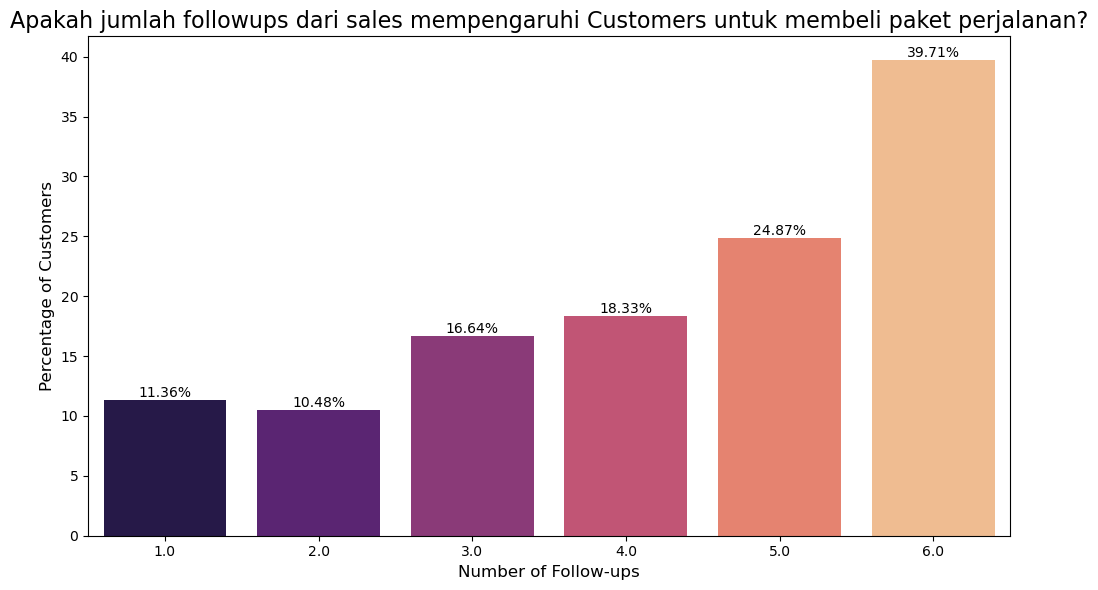

In [29]:
import pandas as pd

# Menghitung total pelanggan
total_customers = df_cast.groupby(['NumberOfFollowups', 'ProdTaken_YN'])['CustomerID'].count().reset_index(name='TotalCustomers')

# Menghitung persentase pelanggan yang mengambil produk
percentage_customers = round(df_cast.groupby(['NumberOfFollowups', 'ProdTaken_YN'])['CustomerID'].count() / df_raw.groupby(['NumberOfFollowups'])['CustomerID'].count() * 100, 2)
percentage_customers = percentage_customers.reset_index(name='PercCust')

# Menggabungkan kedua DataFrame
df_followups = total_customers.merge(percentage_customers, on=['NumberOfFollowups', 'ProdTaken_YN'])
df_followups = df_followups[df_followups.ProdTaken_YN == 'Yes'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfFollowups', y='PercCust', data=df_followups, palette='magma')

for idx, value in enumerate(df_followups['PercCust']):
    plt.text(idx, value, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Number of Follow-ups', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.title('Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?', fontsize=16)
plt.tight_layout()
plt.show()

Insight

adanya kecenderungan bahwa semakin banyak jumlah follow-up yang dilakukan oleh sales, semakin tinggi persentase pelanggan yang akhirnya memutuskan untuk membeli paket perjalanan. Presentase pelanggan yang membeli meningkat secara signifikan dari sekitar 11.36% pada satu follow-up menjadi 39.71% pada enam follow-up.

Hal ini menunjukkan adanya korelasi positif antara jumlah follow-up yang dilakukan oleh sales dengan keputusan pelanggan untuk membeli paket perjalanan. Semakin banyak interaksi atau tindak lanjut yang dilakukan, semakin tinggi kemungkinan pelanggan untuk mengambil keputusan pembelian. Hal ini dapat menjadi indikasi bahwa strategi follow-up yang lebih intens memiliki dampak yang positif terhadap peningkatan konversi pelanggan dalam membeli paket perjalanan.

#### Kelompok umur manakah yang lebih banyak membeli paket perjalanan?

In [30]:
print('Data usia dimulai dari {} hingga {}'.format(int(df_cast['Age'].min()), int(df_cast['Age'].max())))

Data usia dimulai dari 18 hingga 61


In [31]:
df_p = df_cast.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomer')\
.merge(df_cast.groupby(['ProductPitched'])['CustomerID'].count(),on ='ProductPitched')
df_p = df_p[df_p.ProdTaken==1].reset_index(drop=True)
df_p['Perc']=round(df_p.TotalCustomer/df_p.CustomerID*100,2)
df_p = df_p.sort_values(by='Perc', ascending=False)

In [32]:
def kategori_umur(x):
    if x>=18 and x<=25:
        return 'Remaja'
    elif x<=45:
        return 'Dewasa'
    else:
        return 'Lansia'
    
df_cast['kategoriumur'] = df_cast['Age'].apply(lambda x : kategori_umur(x))
kategori_umur = df_cast.groupby(['kategoriumur', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomers')\
             .merge(df_cast.groupby(['kategoriumur'])['CustomerID'].count().reset_index(name='TotalCustomers'),on='kategoriumur')

df_p = df_p.sort_values(by='Perc',ascending=False)
kategori_umur['Perc']= round(kategori_umur.TotalCustomers_x/kategori_umur.TotalCustomers_y*100,2)
kategori_umur = kategori_umur[kategori_umur.ProdTaken==1].sort_values('Perc',ascending=False).reset_index(drop=True)

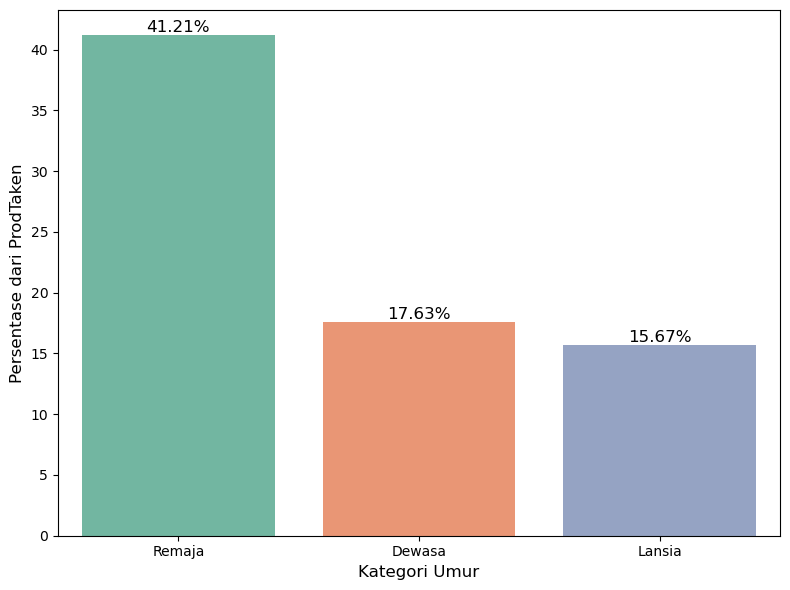

In [33]:
plt.figure(figsize=(8, 6))

# Membuat diagram batang menggunakan Seaborn
sns.barplot(x='kategoriumur', y='Perc', data=kategori_umur, palette='Set2')

# Label sumbu x dan y
plt.xlabel('Kategori Umur', fontsize=12)
plt.ylabel('Persentase dari ProdTaken', fontsize=12)

# Menambahkan label nilai persen pada setiap batang
for index, row in kategori_umur.iterrows():
    plt.text(index, row['Perc'], f'{row["Perc"]:.2f}%', ha='center', va='bottom', fontsize=12)

# Menyesuaikan tata letak visualisasi
plt.tight_layout()
plt.show()

In [34]:
df_cast.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken_YN', 'kategoriumur'],
      dtype='object')

Insight 

kategori Remaja memiliki presentase konversi tertinggi (41.21%) dibandingkan dengan kategori Dewasa (17.63%) dan Lansia (15.67%). Ini menunjukkan bahwa pelanggan dalam kategori Remaja cenderung lebih mungkin untuk mengambil produk perjalanan dibandingkan dengan kategori Dewasa dan Lansia.

Insight yang dapat diambil dari data ini adalah bahwa usia pelanggan, khususnya dalam kategori Remaja, mungkin memiliki pengaruh yang signifikan terhadap keputusan untuk mengambil produk perjalanan. Ini bisa menjadi informasi berharga dalam mengarahkan strategi pemasaran atau penawaran produk perjalanan kepada segmen yang lebih muda.

#### Apakah Customer dari tiap City Tier yang berbeda memiliki ketertarikan dalam membeli paket perjalanan?

In [35]:
df_citytier = df_cast.groupby(['CityTier', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomers')\
        .merge(df_cast.groupby(['CityTier'])['CustomerID'].count(),on = 'CityTier')
df_citytier = df_citytier[df_citytier.ProdTaken==1].reset_index(drop=True)
df_citytier['Persen']=round(df_citytier.TotalCustomers/df_citytier.CustomerID*100,2)
df_citytier = df_citytier.sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_citytier

,CityTier,ProdTaken,TotalCustomers,CustomerID,Persen
0,3,1,354,1500,23.60
1,2,1,46,198,23.23
2,1,1,520,3190,16.30


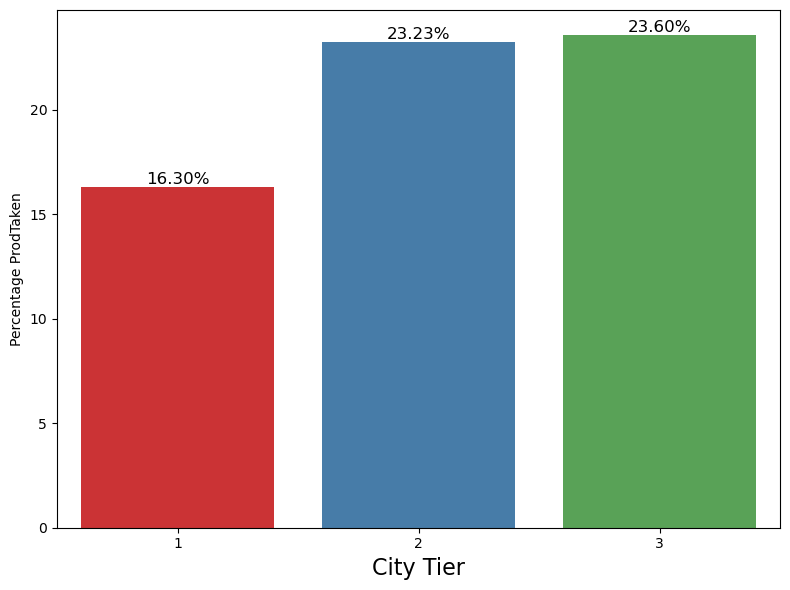

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CityTier', y='Persen', data=df_citytier, palette='Set1')
plt.title('')
plt.xlabel('City Tier', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_citytier.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Insight

tingkat konversi, atau persentase pelanggan yang telah mengambil produk, ternyata lebih tinggi di CityTier 3 (23.60%) dan CityTier 2 (23.23%) meskipun jumlah pelanggannya lebih sedikit dibandingkan dengan CityTier 1 (16.30%) yang memiliki jumlah pelanggan terbanyak. Hal ini menunjukkan bahwa meskipun jumlah pelanggan bisa lebih sedikit, tingkat konversi yang lebih tinggi di CityTier 3 dan 2 bisa menjadi peluang yang menarik dalam strategi pemasaran, mungkin dengan fokus lebih lanjut pada profil atau preferensi pelanggan di tingkat kota tersebut.

#### Apakah Customers yang memiliki passport lebih tertarik mengambil paket perjalanan?

In [37]:
df_passport = df_cast.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(df_cast.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['Persen']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken==1].sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_passport

,Passport,ProdTaken,CustomerID_x,CustomerID_y,Persen
0,1,1,494,1422,34.74
1,0,1,426,3466,12.29


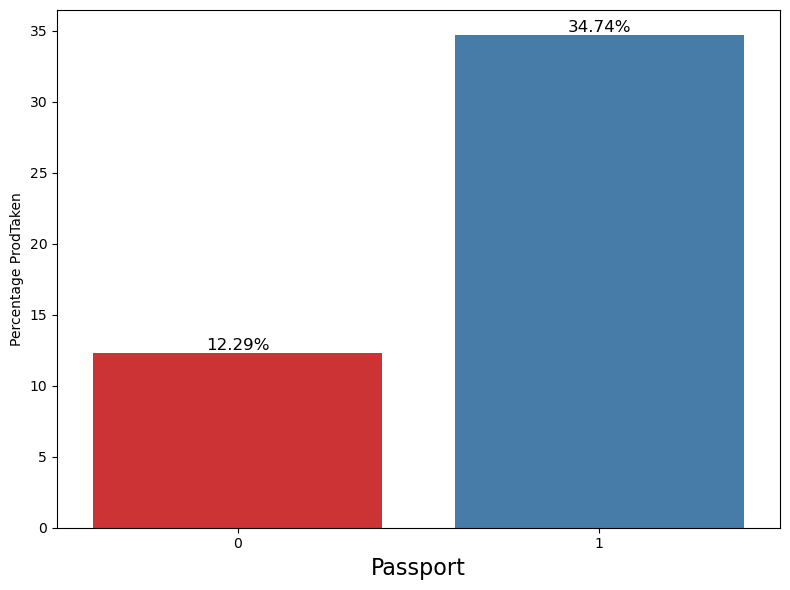

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Passport', y='Persen', data=df_passport, palette='Set1')
plt.title('')
plt.xlabel('Passport', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_passport.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Insight: 

terdapat perbedaan signifikan dalam persentase pelanggan yang telah mengambil produk antara mereka yang memiliki paspor dan yang tidak memiliki. Proporsi pelanggan yang telah mengambil produk jauh lebih tinggi di antara mereka yang memiliki paspor (34.74%) dibandingkan dengan yang tidak memiliki (12.29%). Hal ini bisa menunjukkan adanya korelasi atau pengaruh antara kepemilikan paspor dengan keputusan pelanggan untuk mengambil produk. Namun, perlu analisis lebih lanjut untuk memahami apakah faktor kepemilikan paspor secara langsung memengaruhi keputusan tersebut atau terdapat faktor lain yang turut berperan dalam pengambilan keputusan pelanggan.

#### Segmentasi MonthlyIncome dan Segmentasi Umur Customers yang mengambiil paket perjalanan

In [39]:
#Refers WHO  Indicators database: Low income is $1 045 or less, 
#middle income is $1 046 to $12 745, high income is $12 745 or more.
def segmentasi_income(a):
    if not pd.isnull(a):
        if a <= 1045:
            segmentasi = 'Low Income'
        elif 1046 <= a <= 1275:
            segmentasi = 'Middle Income'
        else:
            segmentasi = 'High Income'
        return segmentasi
    else:
        return 'Missing'
    

In [40]:
df_cast['segmentasi_income'] = df['MonthlyIncome'].apply(lambda x: segmentasi_income(x))
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [41]:
gb1 = df_cast.groupby(['segmentasi_income', 'ProdTaken']).agg({'CustomerID':'nunique'}).reset_index()
gb1

,segmentasi_income,ProdTaken,CustomerID
0,High Income,0,3766
1,High Income,1,888
2,Low Income,0,1
3,Missing,0,201
4,Missing,1,32


In [42]:
gb2 = df_cast.groupby('segmentasi_income').agg({'CustomerID':'nunique'}).reset_index()
gb2

,segmentasi_income,CustomerID
0,High Income,4654
1,Low Income,1
2,Missing,233


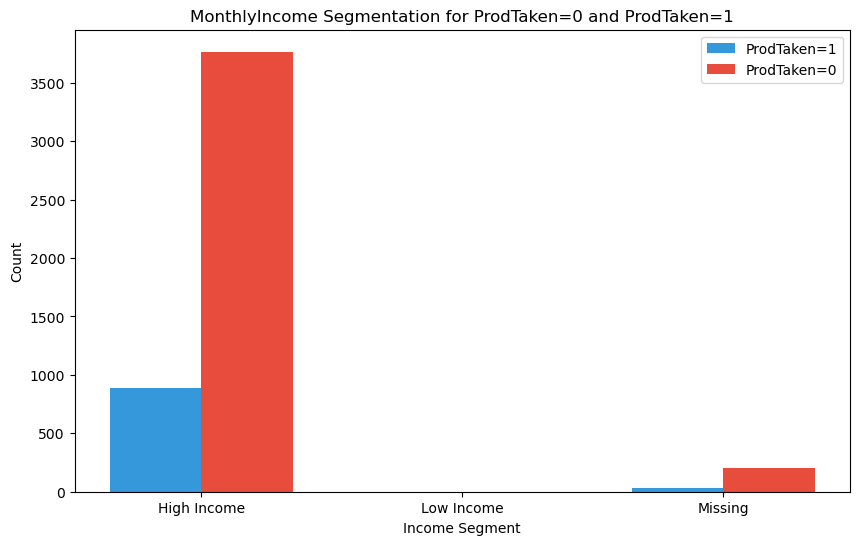

In [43]:
# Assuming 'segmentasi_income' is a categorical variable in your DataFrame
segment_counts_1 = df_cast[df_cast['ProdTaken'] == 1]['segmentasi_income'].value_counts()
segment_counts_0 = df_cast[df_cast['ProdTaken'] == 0]['segmentasi_income'].value_counts()

# Extract unique income segments
income_segments = segment_counts_1.index.union(segment_counts_0.index)

# Set up positions for bars
bar_positions = np.arange(len(income_segments))
bar_width = 0.35

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(bar_positions - bar_width/2, segment_counts_1.reindex(income_segments, fill_value=0), bar_width, label='ProdTaken=1', color='#3498db')
ax.bar(bar_positions + bar_width/2, segment_counts_0.reindex(income_segments, fill_value=0), bar_width, label='ProdTaken=0', color='#e74c3c')

ax.set_xticks(bar_positions)
ax.set_xticklabels(income_segments)
ax.set_xlabel('Income Segment')
ax.set_ylabel('Count')
ax.set_title('MonthlyIncome Segmentation for ProdTaken=0 and ProdTaken=1')
ax.legend()

plt.show()

Insight

Pada grafik diatas terlihat bahwa kategori 'High Income' menonjol dengan jumlah tertinggi dalam kategori 'ProdTaken=0', mencapai total 3766 pelanggan. Jumlah persentase customer yang melakukan pembelian produk ('ProdTaken=1') dibanding customer yang ditelfon juga terbanyak ada pada kategori 'High Income', mencapai 23.5%.

Business Recomendation

Terdapat faktor lain yang mungkin memengaruhi keputusan pembelian sehingga persentase customer yang membeli produk rendah, marital status contohnya. Dengan melibatkan atribut tambahan ini dalam analisis, kita mungkin dapat mendapatkan wawasan lebih mendalam mengenai pola pembelian dan mengoptimalkan strategi pemasaran.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


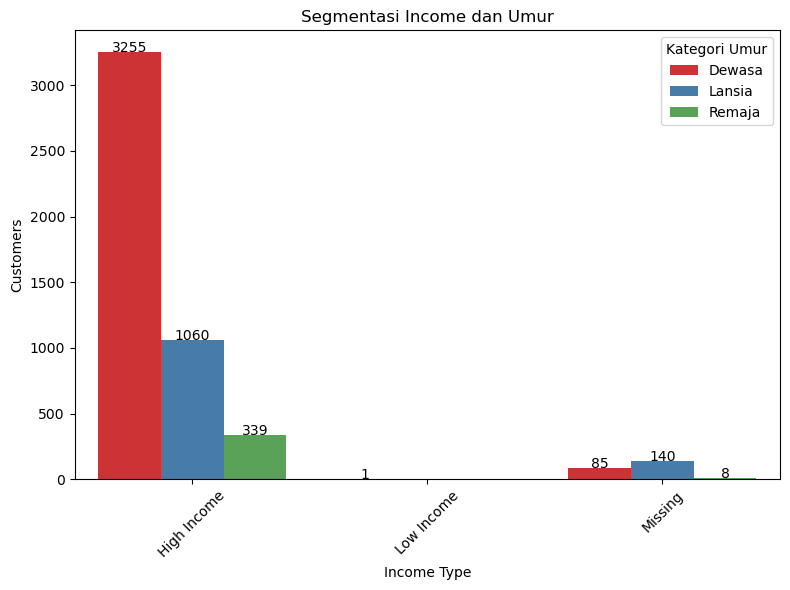

In [44]:
# Pengelompokan ganda berdasarkan segmentasi pendapatan dan segmentasi umur
segmentasi_combined = df_cast.groupby(['segmentasi_income', 'kategoriumur'])['CustomerID'].count().reset_index()

# Visualisasi pengelompokan ganda
plt.figure(figsize=(8, 6))
plot = sns.barplot(x='segmentasi_income', y='CustomerID', hue='kategoriumur', data=segmentasi_combined, palette='Set1')
plt.xlabel('Income Type')
plt.ylabel('Customers')
plt.title('Segmentasi Income dan Umur')
plt.legend(title='Kategori Umur', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Menambahkan label nilai pada setiap bar
for p in plot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.0f}', ha='center')

plt.show()


Insight:

Distribusi jumlah pelanggan terlihat berbeda antara segmen pendapatan, dengan segmen Low Income menunjukkan jumlah pelanggan yang paling tinggi, terutama dari kategori Dewasa, sementara segmen High Income memiliki jumlah pelanggan yang lebih rendah secara umum.

In [45]:
def segment(x):
    if x['Age'] <= 21:
        segment = 'Teen'
    elif (x['Age'] >= 21 and x['Age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

In [46]:
df_cast['segment'] = df_cast.apply(lambda x: segment(x), axis=1)
df_cast.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken_YN,kategoriumur,segmentasi_income,segment
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,1,2,1,0.0,Manager,20993.0,Yes,Dewasa,High Income,Adult
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,0,3,1,2.0,Manager,20130.0,No,Lansia,High Income,Adult
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,1,3,0,0.0,Executive,17090.0,Yes,Dewasa,High Income,Adult
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,1,5,1,1.0,Executive,17909.0,No,Dewasa,High Income,Adult
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,0,5,1,0.0,Executive,18468.0,No,Lansia,High Income,Elderly


In [47]:
gb1 = df_cast.groupby(['segment', 'ProdTaken']).agg({'CustomerID':'nunique'}).reset_index()

gb1

,segment,ProdTaken,CustomerID
0,Adult,0,3579
1,Adult,1,758
2,Elderly,0,341
3,Elderly,1,85
4,Teen,0,48
5,Teen,1,77


In [48]:
gb2 = df_cast.groupby('segment').agg({'CustomerID':'nunique'}).reset_index()

gb2

,segment,CustomerID
0,Adult,4337
1,Elderly,426
2,Teen,125


In [49]:
gb2 = df_cast.groupby('segment').agg({'CustomerID':'nunique'}).reset_index()

gbm = gb1.merge(gb2 , how='inner', on='segment')

gbm.columns = ['segment', 'ProdTaken', 'Pelanggan Ditelfon','Total Pelanggan']

gbm

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan
0,Adult,0,3579,4337
1,Adult,1,758,4337
2,Elderly,0,341,426
3,Elderly,1,85,426
4,Teen,0,48,125
5,Teen,1,77,125


In [50]:
gbm['Rasio'] = 100 * gbm['Pelanggan Ditelfon'] / gbm.groupby('Total Pelanggan')['Pelanggan Ditelfon'].transform('sum')
gbm

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
0,Adult,0,3579,4337,82.522481
1,Adult,1,758,4337,17.477519
2,Elderly,0,341,426,80.046948
3,Elderly,1,85,426,19.953052
4,Teen,0,48,125,38.400000
5,Teen,1,77,125,61.600000


In [51]:
result = gbm[(gbm['ProdTaken']==1)]
result

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
1,Adult,1,758,4337,17.477519
3,Elderly,1,85,426,19.953052
5,Teen,1,77,125,61.600000


<Figure size 1000x1500 with 0 Axes>

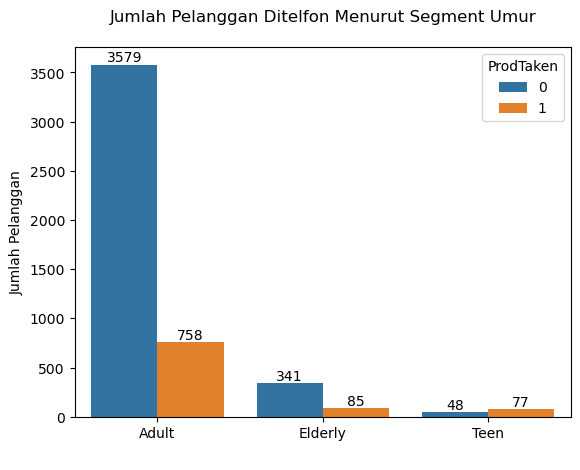

<Figure size 1000x1500 with 0 Axes>

In [52]:
ax = sns.barplot(y='Pelanggan Ditelfon', x='segment', data=gbm, hue='ProdTaken', errwidth=0)

ax.set(xlabel=' ', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Ditelfon Menurut Segment Umur\n')

for container in ax.containers:
    ax.bar_label(container)

plt.figure(figsize=(10,15))

<Figure size 1000x1500 with 0 Axes>

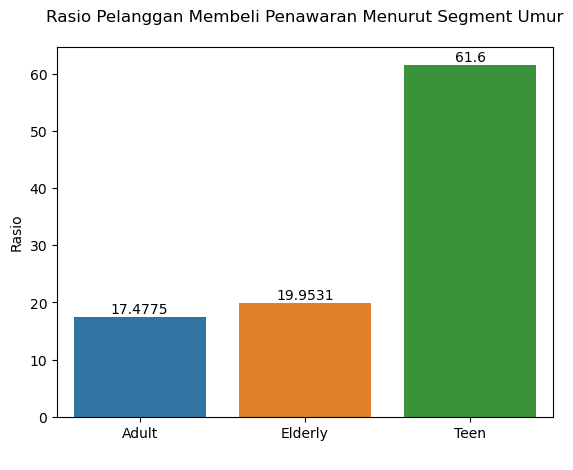

<Figure size 1000x1500 with 0 Axes>

In [53]:
ax2 = sns.barplot(y='Rasio', x='segment', data=result, errwidth=0)

ax2.set(xlabel=' ', ylabel='Rasio', title='Rasio Pelanggan Membeli Penawaran Menurut Segment Umur\n')

for container in ax2.containers:
    ax2.bar_label(container)

plt.figure(figsize=(10,15))

### Business Insights

Dari grafik diatas dapat dilihat bahwa mayoritas pelanggan yang diberikan tawaran dan membeli tawaran holiday package adalah pelanggan dewasa yang berumur 21 - 55 tahun, sedangkan yang diberikan tawaran paling sedikit adalah pelanggan remaja yang berumur dibawah 21 tahun. Namun dari segi efektifitas, datanya berkebalikan dimana sangat banyak pelanggan dewasa yang menolak tawaran dibandingkan menerima tawaran dilihat dari rasio pelanggan menerima tawaran yaitu senilai **17.47%**, sebaliknya pelanggan usia remaja memiliki rasio terima tawaran yang besar senilai **61.6%** yang berarti pelanggan remaja lebih banyak menerima tawaran dibanding menolak tawaran dari telfon yang telah dilakukan.

### Business Recommendations

Dari data diatas dilihat penawaran kepada pelanggan usia remaja memiliki rasio pembelian yang tinggi, maka disarankan kepada tim Marketing untuk menambah frekuensi penawaran kepada pelanggan usia remaja dan mengurangi frekuensi penawaran kepada pelanggan usia dewasa untuk meningkatkan efektifitas pemasaran untuk produk holiday package.

In [54]:
gb3 = df_cast.groupby(['Occupation' , 'ProdTaken']).agg({'CustomerID':'nunique'}).reset_index()
gb3

,Occupation,ProdTaken,CustomerID
0,Free Lancer,1,2
1,Large Business,0,314
2,Large Business,1,120
3,Salaried,0,1954
4,Salaried,1,414
5,Small Business,0,1700
6,Small Business,1,384


In [55]:
gb4 = df_cast.groupby('Occupation').agg({'CustomerID':'nunique'}).reset_index()

gbm2 = gb3.merge(gb4 , how='left', on='Occupation')

gbm2.columns = ['Occupation', 'ProdTaken', 'Pelanggan Ditelfon','Total Pelanggan']

gbm2

,Occupation,ProdTaken,Pelanggan Ditelfon,Total Pelanggan
0,Free Lancer,1,2,2
1,Large Business,0,314,434
2,Large Business,1,120,434
3,Salaried,0,1954,2368
4,Salaried,1,414,2368
5,Small Business,0,1700,2084
6,Small Business,1,384,2084


In [56]:
gbm2['Rasio'] = round (100 * gbm2['Pelanggan Ditelfon'] / gbm2.groupby('Total Pelanggan')['Pelanggan Ditelfon'].transform('sum'),2)
gbm2

,Occupation,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
0,Free Lancer,1,2,2,100.00
1,Large Business,0,314,434,72.35
2,Large Business,1,120,434,27.65
3,Salaried,0,1954,2368,82.52
4,Salaried,1,414,2368,17.48
5,Small Business,0,1700,2084,81.57
6,Small Business,1,384,2084,18.43


In [57]:
result2 = gbm2[(gbm2['ProdTaken']==1)]
result2

,Occupation,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
0,Free Lancer,1,2,2,100.00
2,Large Business,1,120,434,27.65
4,Salaried,1,414,2368,17.48
6,Small Business,1,384,2084,18.43


<Figure size 1000x1500 with 0 Axes>

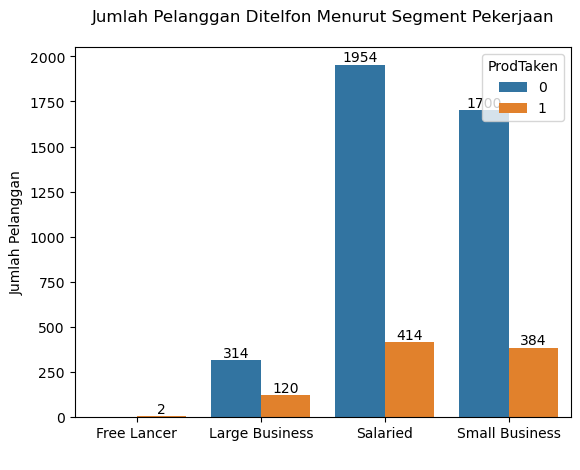

<Figure size 1000x1500 with 0 Axes>

In [58]:
ax3 = sns.barplot(y='Pelanggan Ditelfon', x='Occupation', data=gbm2, hue='ProdTaken', errwidth=0)

ax3.set(xlabel=' ', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Ditelfon Menurut Segment Pekerjaan\n')

for container in ax3.containers:
    ax3.bar_label(container)

plt.figure(figsize=(10,15))

<Figure size 1000x1500 with 0 Axes>

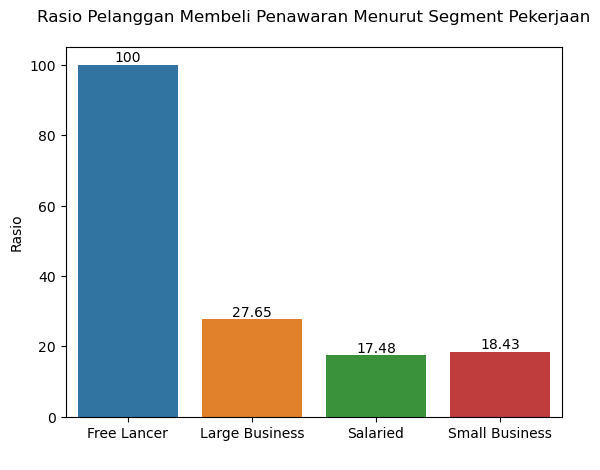

<Figure size 1000x1500 with 0 Axes>

In [59]:
ax4 = sns.barplot(y='Rasio', x='Occupation', data=result2, errwidth=0)

ax4.set(xlabel=' ', ylabel='Rasio', title='Rasio Pelanggan Membeli Penawaran Menurut Segment Pekerjaan\n')

for container in ax4.containers:
    ax4.bar_label(container)

plt.figure(figsize=(10,15))

### Business Insights

Dari grafik diatas dapat dilihat bahwa mayoritas penawaran yang dilakukan untuk holiday package ditujukan kepada pelanggan yang digaji sebanyak **2368 pelanggan** dan pelanggan yang memiliki usaha kecil sebanyak **2084 pelanggan**, sedangkan pelanggan dengan usaha berskala besar hanya sedikit yang diberikan tawaran yaitu sebanyak **434 pelanggan**. Untuk pelanggan freelancer dikarenakan data yang dimiliki masih belum cukup untuk dijadikan acuan karena hanya ada **2 pelanggan** yang diberi tawaran, maka untuk sementara data ini diabaikan. Dari data diatas dapat dilihat rasio pelanggan yang menerima tawaran holiday package. Data menunjukkan bahwa pelanggan yang memiliki bisnis berskala besar memiliki rasio paling tinggi yaitu sebesar **27.64%**, disusul oleh pelanggan berbisnis kecil dengan **18.42%** lalu pelanggan yang digaji sebesar **17.48%**.

### Business Recommendations 

Dari insights yang telah didapatkan dapat disimpulkan bahwa pelanggan dengan bisnis besar memiliki tingkat keefektifan paling tinggi untuk diberikan tawaran holiday package yaitu sebesar **27.64%**, dibandingkan dengan pelanggan yang digaji dan pelanggan berbisnis kecil. Maka disarankan kepada tim marketing untuk menambah frekuensi penawaran kepada pelanggan dengan bisnis besar ketimbang penawaran kepada pelanggan berbisnis kecil dan pelanggan yang digaji untuk meningkatkan efektifitas pemasaran untuk produk holiday package.

# Stage 2 Data Preprocessing

In [60]:
df_prep = df.copy()
df_prep = df_prep.drop(columns='CustomerID')

## Data Cleansing

In [61]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

print('Gender :', df_prep['Gender'].unique().tolist())
print('Marital Status:', df_prep['MaritalStatus'].unique().tolist())

Gender : ['Female', 'Male']
Marital Status: ['Unmarried', 'Divorced', 'Married']


In [62]:
handled = ['Gender', 'MaritalStatus']
for i in handled:
    print(f'''Value count kolom {i}:''')
    print(df_prep[i].value_counts())
    print()

Value count kolom Gender:
Male      2916
Female    1972
Name: Gender, dtype: int64

Value count kolom MaritalStatus:
Married      2340
Unmarried    1598
Divorced      950
Name: MaritalStatus, dtype: int64



## Handling Missing Values

In [63]:
# Menghitung kolom yang memiliki data yang hilang
miss_cols = df_prep.columns[df_prep.isnull().any()]

# Menghitung jumlah data yang hilang untuk setiap kolom yang memiliki nilai null
missing_df = df_prep[miss_cols].isnull().sum()

# Menampilkan jumlah data yang hilang untuk setiap kolom
print(missing_df)

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64


In [64]:
# Numerikal
df_prep[miss_cols].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [65]:
# Kategorikal
df_prep[miss_cols].select_dtypes(include='object').describe()

,TypeofContact
count,4863
unique,2
top,Self Enquiry
freq,3444


In [66]:
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['TypeofContact'].fillna('Unknown', inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(0, inplace=True)
df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [67]:
print('Apakah masih ada nilai null?', df_prep.isnull().any())

Apakah masih ada nilai null? ProdTaken                   False
Age                         False
TypeofContact               False
CityTier                    False
DurationOfPitch             False
Occupation                  False
Gender                      False
NumberOfPersonVisiting      False
NumberOfFollowups           False
ProductPitched              False
PreferredPropertyStar       False
MaritalStatus               False
NumberOfTrips               False
Passport                    False
PitchSatisfactionScore      False
OwnCar                      False
NumberOfChildrenVisiting    False
Designation                 False
MonthlyIncome               False
dtype: bool


## Handling Outliers

In [68]:
# from scipy import stats
# print('Jumlah baris sebelum dilakukan filtering outlier :', df_prep.shape[0])

# f_outlier = np.array([True] * len(df_prep))
# outlier_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

# for col in outlier_cols:
#     z_scores = abs(stats.zscore(df_prep[col]))
#     f_outlier = f_outlier & (z_scores < 3)

# df_prep = df_prep[f_outlier]
# print('Jumlah baris setelah dilakukan filtering outlier :', df_prep.shape[0])

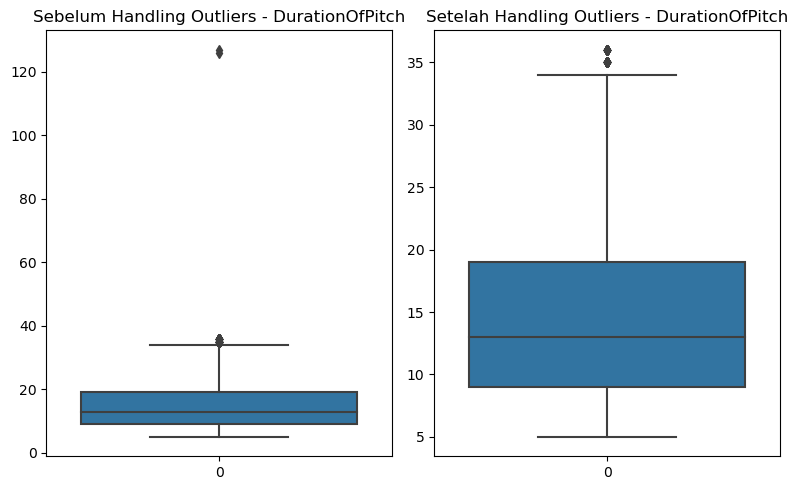

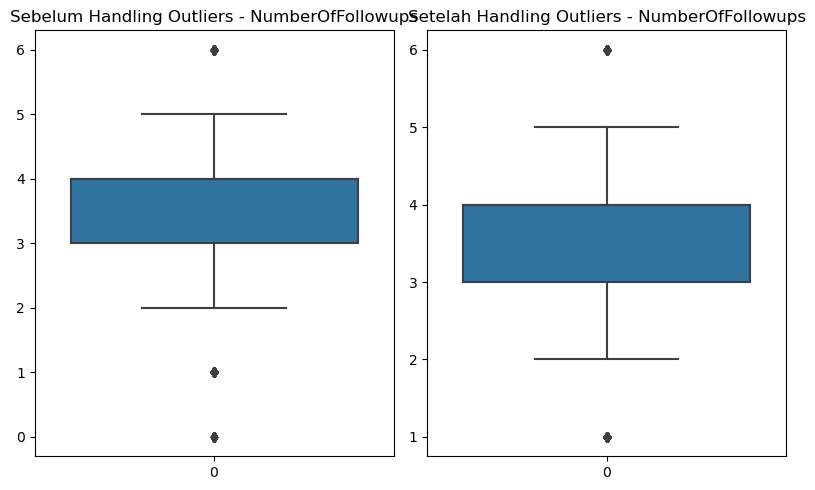

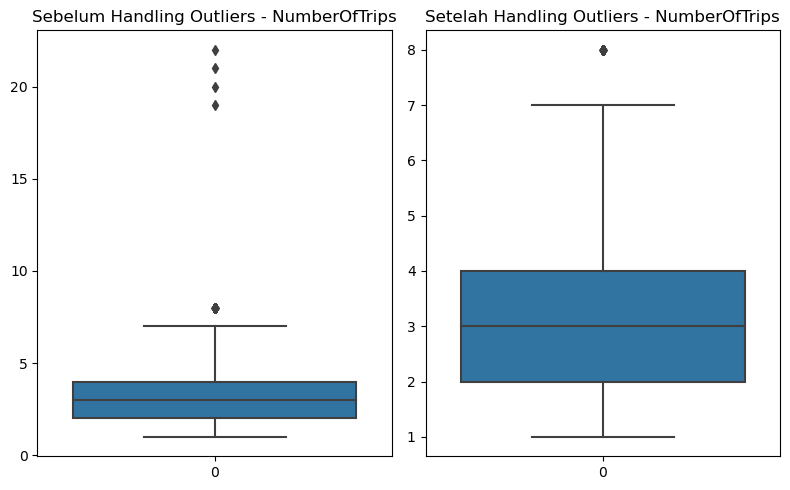

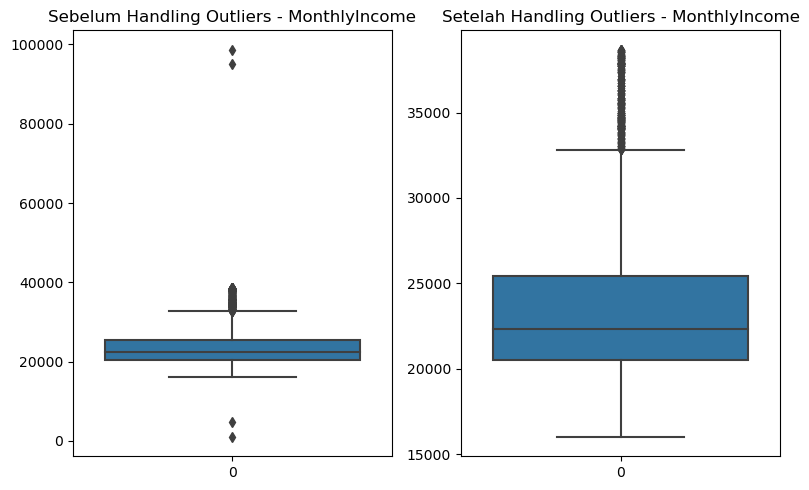

In [69]:
from scipy import stats

# Menginisialisasi list untuk menyimpan kolom-kolom dengan outliers
cols_with_outliers = []

# Loop untuk mengecek outliers di setiap kolom
for col in df_prep.columns:
    if df_prep[col].dtype in ['int64', 'float64']:  # Memastikan kolom numerik saja yang diperiksa
        z_scores = abs(stats.zscore(df_prep[col]))
        f_outlier = z_scores > 3  # Misalnya, threshold Z-score > 3 sebagai indikasi outliers
        if f_outlier.any():  # Jika ada outlier dalam kolom tersebut
            cols_with_outliers.append(col)  # Menyimpan nama kolom dengan outliers

# Visualisasi sebelum dan sesudah penanganan outliers untuk setiap kolom yang memiliki outliers
for col in cols_with_outliers:
    plt.figure(figsize=(8, 5))

    # Boxplot sebelum penanganan outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_prep[col])
    plt.title(f'Sebelum Handling Outliers - {col}')

    # Handling outliers dengan Z-score
    z_scores = abs(stats.zscore(df_prep[col]))
    f_outlier = z_scores > 3
    filtered_data = df_prep[~f_outlier]

    # Boxplot setelah penanganan outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(data=filtered_data[col])
    plt.title(f'Setelah Handling Outliers - {col}')

    plt.tight_layout()
    plt.show()


## Feature Engineering

## Feature Extraction

Melakukan segmentasi pada feature Age dan Income

In [70]:
def segment(x):
    if x['Age'] <= 21:
        segment = 'Teen'
    elif (x['Age'] >= 21 and x['Age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

In [71]:
df_prep['segmentasi_umur'] = df_prep.apply(lambda x: segment(x), axis=1)
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_umur
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Adult
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Adult
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Adult


In [72]:
def segmentasi_income(a):
        if a['MonthlyIncome'] <= 1045:
            segmentasi = 'Low Income'
        elif 1046 <= a['MonthlyIncome'] <= 1275:
            segmentasi = 'Middle Income'
        else:
            segmentasi = 'High Income'
        return segmentasi

In [73]:
df_prep['segmentasi_income'] = df_prep.apply(lambda x: segmentasi_income(x), axis=1)
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_umur,segmentasi_income
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,...,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Adult,High Income
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult,High Income
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,...,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Adult,High Income
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult,High Income
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Adult,High Income


In [74]:
# Melihat nilai unik dan value counts pada kolom-kolom kategorikal
for col in cat:
    unique_values = df_prep[col].unique()
    value_counts = df_prep[col].value_counts()

    print(f"Unique values in '{col}':\n{unique_values}\n")
    print(f"Value counts in '{col}':\n{value_counts}\n")
    print('-' * 40)

Unique values in 'TypeofContact':
['Self Enquiry' 'Company Invited' 'Unknown']

Value counts in 'TypeofContact':
Self Enquiry       3444
Company Invited    1419
Unknown              25
Name: TypeofContact, dtype: int64

----------------------------------------
Unique values in 'Occupation':
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Value counts in 'Occupation':
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

----------------------------------------
Unique values in 'Gender':
['Female' 'Male']

Value counts in 'Gender':
Male      2916
Female    1972
Name: Gender, dtype: int64

----------------------------------------
Unique values in 'ProductPitched':
['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

Value counts in 'ProductPitched':
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

-----------------

In [75]:
# Hapus Free Lancer Pada Occupation
df_prep = df_prep[df_prep['Occupation'] != 'Free Lancer']

print('Dimensi data sebelum encoding adalah:', df_prep.shape[0], 'baris dan', df_prep.shape[1], 'kolom')

# Label Encoding
df_prep['Gender'] = df_prep['Gender'].map({'Female':1, 'Male':2})
df_prep['ProductPitched'] =  df_prep['ProductPitched'].map({'Basic':0,
                                                            'Deluxe':1,
                                                            'Standard':2,
                                                            'Super Deluxe':3,
                                                            'King': 4})
df_prep['Designation'] = df_prep['Designation'].map({'Manager':0,
                                                     'Senior Manager':1,
                                                     'Executive': 2,
                                                     'AVP': 3,
                                                     'VP': 4})

df_prep['segmentasi_umur'] = df_prep['segmentasi_umur'].map({'Teen':0,
                                                            'Adult':1,
                                                            'Elderly':2})
df_prep['segmentasi_income'] =  df_prep['segmentasi_income'].map({'Low Income':0,
                                                          'Middle Income':1,
                                                          'High Income':2})

from sklearn.preprocessing import OneHotEncoder
# One Hot Encoding
for col in ['TypeofContact', 'Occupation', 'MaritalStatus','Designation','Gender','ProductPitched']:
    onehots = pd.get_dummies(df_prep[col], prefix=col,drop_first=True)
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)

print('Dimensi data setelah encoding adalah:', df_prep.shape[0], 'baris dan', df_prep.shape[1], 'kolom')

Dimensi data sebelum encoding adalah: 4886 baris dan 21 kolom
Dimensi data setelah encoding adalah: 4886 baris dan 30 kolom


In [76]:
df_corr = df_prep.corr().iloc[1:, 1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
correlated_features = []
for i in df_corr.index:
    for col in df_corr.columns:
        correlated_features.append([i, col])
        if (np.abs(df_corr.loc[i, col]) > 0.5) and (i != col) and [col, i] not in correlated_features:
            print(f"{i} with {col} has correlation: {df_corr.loc[i, col]}")

Age with segmentasi_umur has correlation: 0.549
NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation: 0.595
MonthlyIncome with Designation_2 has correlation: -0.518
MonthlyIncome with Designation_4 has correlation: 0.521
MonthlyIncome with ProductPitched_4 has correlation: 0.521
Occupation_Salaried with Occupation_Small Business has correlation: -0.836
MaritalStatus_Married with MaritalStatus_Unmarried has correlation: -0.668
Designation_1 with ProductPitched_2 has correlation: 1.0
Designation_2 with ProductPitched_1 has correlation: -0.576
Designation_3 with ProductPitched_3 has correlation: 1.0
Designation_4 with ProductPitched_4 has correlation: 1.0


Kesimpulan 

NumberOfPersonVisiting & NumberOfChildrenVisiting Analisis menunjukkan bahwa jumlah orang yang berkunjung memiliki korelasi yang cukup kuat dengan jumlah anak yang turut serta. Mengetahui rasio jumlah anak per pengunjung atau membuat kategori berdasarkan total pengunjung dapat memberikan wawasan tambahan.

ProductPitched & MonthlyIncome Korelasi yang tinggi antara produk yang ditawarkan dengan pendapatan bulanan menyarankan pentingnya menyesuaikan produk yang ditawarkan sesuai dengan tingkat pendapatan pelanggan. Adopsi strategi pemasaran yang menargetkan produk spesifik untuk segmentasi pendapatan dapat meningkatkan efektivitas penjualan.

Occupation_Salaried & Occupation_Small Business Perbedaan yang signifikan antara jenis pekerjaan "Salaried" dan "Small Business" mengindikasikan adanya pola preferensi yang dapat dimanfaatkan dalam strategi pemasaran. Memahami preferensi atau kebutuhan yang berbeda antara kategori pekerjaan ini bisa menjadi landasan untuk menyusun strategi pemasaran yang lebih tepat.

MaritalStatus_Married & MaritalStatus_Unmarried Korelasi kuat antara status pernikahan menunjukkan bahwa ada perbedaan perilaku atau preferensi antara orang yang sudah menikah dan yang belum menikah. Memahami perbedaan ini dapat membantu dalam merancang strategi pemasaran yang lebih terfokus untuk setiap kelompok ini.

## Split Train & Test Data

In [77]:
X = df_prep.drop('ProdTaken', axis=1)
y = df_prep['ProdTaken']

In [78]:
from sklearn.model_selection import train_test_split

# Melakukan pemisahan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Menampilkan jumlah data dalam setiap subset
print("Jumlah data latih terdiri dari:", len(X_train))
print("Jumlah data uji terdiri dari:", len(X_test))

Jumlah data latih terdiri dari: 3420
Jumlah data uji terdiri dari: 1466


### Syntax Normalization, Standardization & Robustscaler

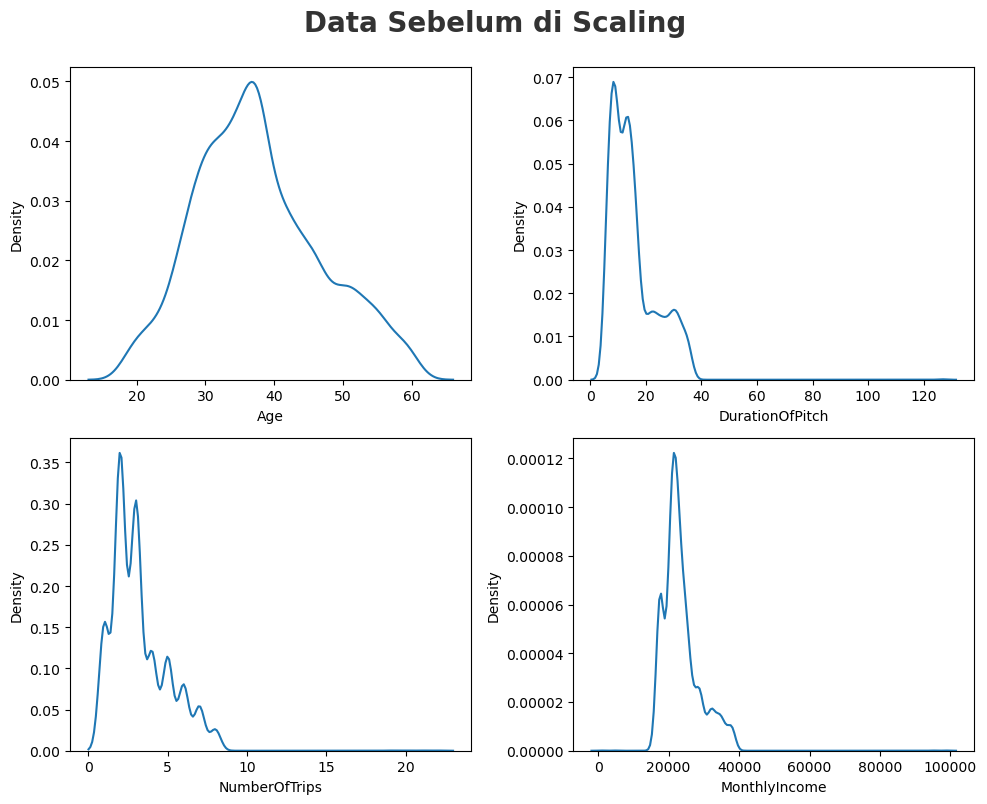

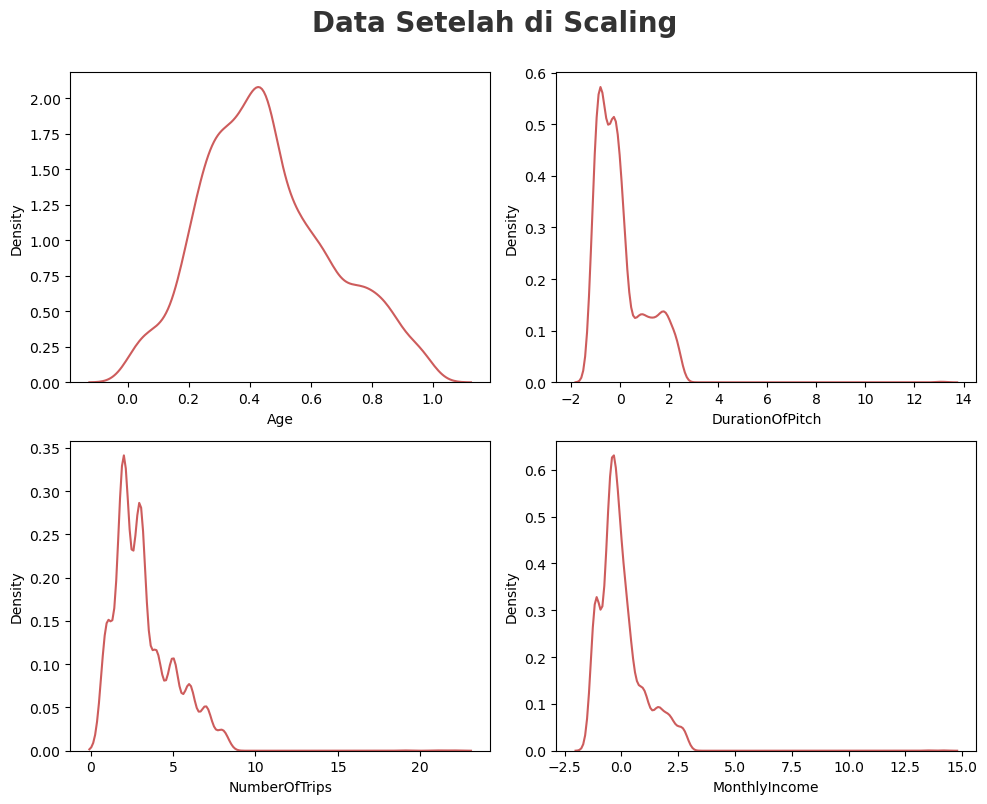

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaling using normalization
scaler = MinMaxScaler()
scaler.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

# scaling using standardization
scaler = StandardScaler()
scaler.fit(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_train['DurationOfPitch'] = scaler.transform(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_test['DurationOfPitch'] = scaler.transform(X_test['DurationOfPitch'].values.reshape(-1, 1))

scaler.fit(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))

plt.figure(figsize=(10, 8))
plt.suptitle('Data Sebelum di Scaling', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE dan Box plot untuk setiap kolom numerikal sebelum scaling
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_prep[col])
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.suptitle('Data Setelah di Scaling', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE dan Box plot untuk setiap kolom numerikal setelah scaling
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

In [80]:
# from sklearn.preprocessing import RobustScaler

# # Inisialisasi RobustScaler
# scaler = RobustScaler()

# # Scaling menggunakan RobustScaler untuk fitur Age
# scaler.fit(X_train['Age'].values.reshape(-1, 1))
# X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
# X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

# # Scaling menggunakan RobustScaler untuk fitur DurationOfPitch
# scaler.fit(X_train['DurationOfPitch'].values.reshape(-1, 1))
# X_train['DurationOfPitch'] = scaler.transform(X_train['DurationOfPitch'].values.reshape(-1, 1))
# X_test['DurationOfPitch'] = scaler.transform(X_test['DurationOfPitch'].values.reshape(-1, 1))

# # Scaling menggunakan RobustScaler untuk fitur MonthlyIncome
# scaler.fit(X_train['MonthlyIncome'].values.reshape(-1, 1))
# X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
# X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))

In [81]:
X_train[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']].describe()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,3420.000000,3.420000e+03,3420.000000,3.420000e+03
mean,0.455606,-4.674623e-17,3.224854,2.867102e-16
std,0.212065,1.000146e+00,1.826176,1.000146e+00
min,0.000000,-1.230528e+00,1.000000,-1.427561e+00
25%,0.302326,-7.589580e-01,2.000000,-5.819725e-01
50%,0.441860,-2.873885e-01,3.000000,-2.304114e-01
75%,0.581395,4.199657e-01,4.000000,3.481417e-01
max,1.000000,1.315234e+01,22.000000,1.418733e+01


### Feature Selection

In [82]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(0.2)
var.fit(X_train)
X_train_fs = pd.DataFrame(var.transform(X_train),columns=var.get_feature_names_out())
X_test_fs = pd.DataFrame(var.transform(X_test),columns=var.get_feature_names_out())

In [83]:
X_train_fs.columns

Index(['CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Self Enquiry', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Designation_2', 'Gender_2',
       'ProductPitched_1'],
      dtype='object')

In [84]:
from sklearn.feature_selection import SelectKBest, f_classif

nums_col = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
 
classif = SelectKBest(f_classif, k=2)
classif.fit(X_train_fs[nums_col], y_train)
X_train_nums = pd.DataFrame(classif.transform(X_train_fs[nums_col]), columns=classif.get_feature_names_out())
X_test_nums = pd.DataFrame(classif.transform(X_test_fs[nums_col]), columns=classif.get_feature_names_out())

In [85]:
from sklearn.feature_selection import chi2

cats_col = ['CityTier','NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'TypeofContact_Self Enquiry', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Designation_2', 'Gender_2',
       'ProductPitched_1']

chi2 = SelectKBest(chi2,k=8)
chi2.fit(X_train_fs[cats_col],y_train)
X_train_chi2 = pd.DataFrame(chi2.transform(X_train_fs[cats_col]),columns=chi2.get_feature_names_out())
X_test_chi2 = pd.DataFrame(chi2.transform(X_test_fs[cats_col]),columns=chi2.get_feature_names_out())

In [86]:
# merging all feature selection result
col_all = classif.get_feature_names_out().tolist() + chi2.get_feature_names_out().tolist()
X_train = X_train[col_all]
X_test = X_test[col_all]

print('Feature hasil seleksi adalah :', col_all)

Feature hasil seleksi adalah : ['DurationOfPitch', 'MonthlyIncome', 'CityTier', 'NumberOfFollowups', 'Passport', 'PitchSatisfactionScore', 'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Designation_2', 'ProductPitched_1']


In [87]:
from imblearn.over_sampling import SMOTE

print('Jumlah data uji sebelum SMOTE terdiri dari', len(X_train), 'baris')
print('Jumlah class 0 :', sum(y_train == 0))  
print('Jumlah class 1 :', sum(y_train == 1), '\n') 

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Jumlah data uji sebelum SMOTE terdiri dari', len(X_test), 'baris')
print('Jumlah class 0 :', sum(y_train == 0))  
print('Jumlah class 1 :', sum(y_train == 1), '\n') 


Jumlah data uji sebelum SMOTE terdiri dari 3420 baris
Jumlah class 0 : 2777
Jumlah class 1 : 643 

Jumlah data uji sebelum SMOTE terdiri dari 1466 baris
Jumlah class 0 : 2777
Jumlah class 1 : 643 



In [88]:
X_train.to_csv('Travel_Prep_train.csv', index=False)
X_test.to_csv('Travel_Prep_test.csv', index=False)

# Modeling

In [89]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    cax = ax.matshow(cm, cmap='Blues')
    plt.colorbar(cax)
    
    plt.xticks([0, 1], ['Not Taken', 'Taken'])
    plt.yticks([0, 1], ['Not Taken', 'Taken'])
    
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i][j]), ha='center', va='center', fontsize=12)
    
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.title('Confusion Matrix ' + title, fontsize=14)
    plt.show()
    
    print(f'Dari model {title} didapatkan bahwa:')
    print(f'- Jumlah TP (True Positive) = {cm[1][1]}')
    print(f'- Jumlah TN (True Negative) = {cm[0][0]}')
    print(f'- Jumlah FP (False Positive) = {cm[0][1]}')
    print(f'- Jumlah FN (False Negative) = {cm[1][0]}')


#### Logistic regression

Cross-Validation Scores: [0.42105263 0.5        0.40425532 0.4        0.3956044  0.44680851
 0.52       0.46315789 0.26       0.45833333]
Mean CV Accuracy: 0.42692120850407517


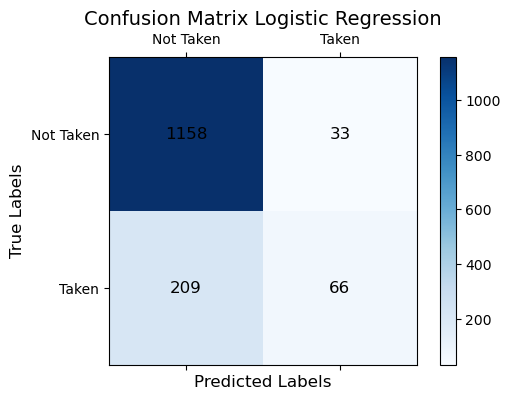

Dari model Logistic Regression didapatkan bahwa:
- Jumlah TP (True Positive) = 66
- Jumlah TN (True Negative) = 1158
- Jumlah FP (False Positive) = 33
- Jumlah FN (False Negative) = 209


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, f1_score

lr_model = LogisticRegression(random_state=42)

# Melakukan cross-validation dengan K-Fold (contoh dengan K=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Menghitung skor cross-validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='f1')

# Melihat skor cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Training model
lr_model.fit(X_train, y_train)

# Plot confusion matrix
plot_confusion_matrix(lr_model, X_test, y_test, title='Logistic Regression')

#### Decision Tree

Cross-Validation Scores for Decision Tree: [0.74626866 0.6870229  0.69230769 0.61428571 0.656      0.67175573
 0.56666667 0.63235294 0.57553957 0.69354839]
Mean CV F1 Score for Decision Tree: 0.6535748252549258


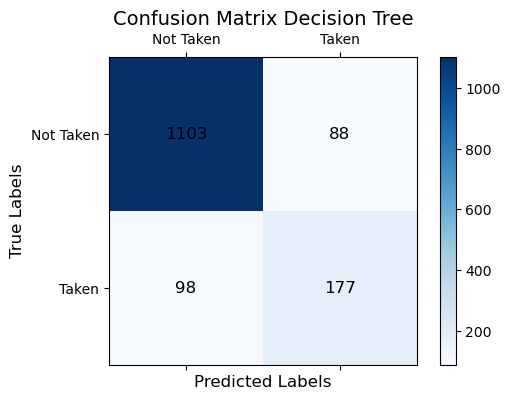

Dari model Decision Tree didapatkan bahwa:
- Jumlah TP (True Positive) = 177
- Jumlah TN (True Negative) = 1103
- Jumlah FP (False Positive) = 88
- Jumlah FN (False Negative) = 98


In [91]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Lakukan cross-validation dengan F1 score sebagai metrik
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='f1')

# Tampilkan hasil cross-validation scores
print("Cross-Validation Scores for Decision Tree:", dt_cv_scores)
print("Mean CV F1 Score for Decision Tree:", dt_cv_scores.mean())

dt_model.fit(X_train, y_train)
plot_confusion_matrix(dt_model, X_test, y_test, title='Decision Tree')

#### Random Forest

Cross-Validation Scores for Random Forest: [0.68965517 0.67924528 0.69090909 0.625      0.74336283 0.74285714
 0.53333333 0.66055046 0.62385321 0.62745098]
Mean CV F1 Score for Random Forest: 0.6616217504507562


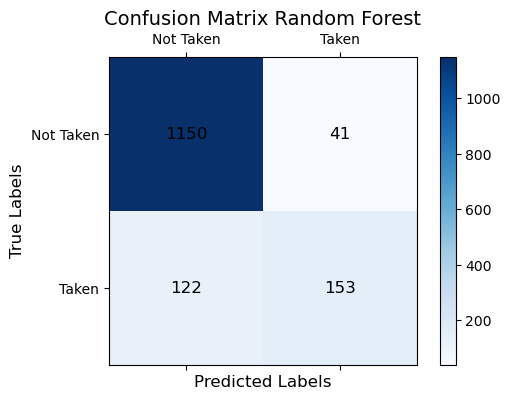

Dari model Random Forest didapatkan bahwa:
- Jumlah TP (True Positive) = 153
- Jumlah TN (True Negative) = 1150
- Jumlah FP (False Positive) = 41
- Jumlah FN (False Negative) = 122


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Lakukan cross-validation dengan F1 score sebagai metrik
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='f1')

# Tampilkan hasil cross-validation scores
print("Cross-Validation Scores for Random Forest:", rf_cv_scores)
print("Mean CV F1 Score for Random Forest:", rf_cv_scores.mean())

rf_model.fit(X_train, y_train)
plot_confusion_matrix(rf_model, X_test, y_test, title='Random Forest')

#### AdaBoost

Cross-Validation Scores for Adaboost: [0.52525253 0.38202247 0.38202247 0.39175258 0.3956044  0.46153846
 0.34782609 0.43478261 0.40816327 0.47916667]
Mean CV F1 Score for Adaboost: 0.42081315311601575


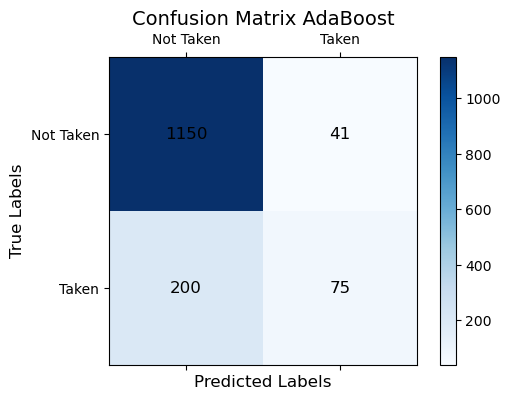

Dari model AdaBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 75
- Jumlah TN (True Negative) = 1150
- Jumlah FP (False Positive) = 41
- Jumlah FN (False Negative) = 200


In [93]:
from sklearn.ensemble import AdaBoostClassifier

# Inisialisasi model Adaboost
adaboost_model = AdaBoostClassifier(random_state=42)

# Lakukan cross-validation dengan F1 score sebagai metrik
ada_cv_scores = cross_val_score(adaboost_model, X_train, y_train, cv=10, scoring='f1')

# Tampilkan hasil cross-validation scores
print("Cross-Validation Scores for Adaboost:", ada_cv_scores)
print("Mean CV F1 Score for Adaboost:", ada_cv_scores.mean())

adaboost_model.fit(X_train, y_train)
plot_confusion_matrix(adaboost_model, X_test, y_test, title='AdaBoost')

#### XGBoost

Cross-Validation Scores for XGBoost: [0.66666667 0.70175439 0.67857143 0.57894737 0.68421053 0.68518519
 0.5        0.65454545 0.58823529 0.69026549]
Mean CV F1 Score for XGBoost: 0.64283817965138


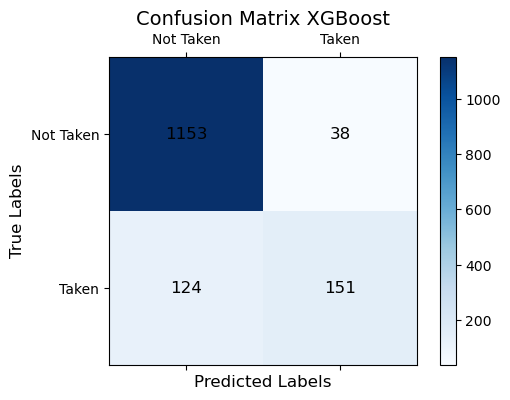

Dari model XGBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 151
- Jumlah TN (True Negative) = 1153
- Jumlah FP (False Positive) = 38
- Jumlah FN (False Negative) = 124


In [94]:
import xgboost as xgb

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Lakukan cross-validation dengan F1 score sebagai metrik
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='f1')

# Tampilkan hasil cross-validation scores
print("Cross-Validation Scores for XGBoost:", xgb_cv_scores)
print("Mean CV F1 Score for XGBoost:", xgb_cv_scores.mean())

xgb_model.fit(X_train, y_train)
plot_confusion_matrix(xgb_model, X_test, y_test, title='XGBoost')

# Model Evaluation

In [95]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [96]:
model_list_base = [lr_model, dt_model, rf_model, adaboost_model, xgb_model]

# Kemudian panggil fungsi score_all_classification dengan model_list_base yang telah didefinisikan
df_results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
df_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Logistic Regression,0.8349,0.6667,0.2400,0.3529,0.7748,0.7962
1,Decision Tree,0.8731,0.6679,0.6436,0.6556,0.7849,1.0000
2,Random Forest,0.8888,0.7887,0.5564,0.6525,0.8811,1.0000
3,AdaBoost,0.8356,0.6466,0.2727,0.3836,0.7782,0.8181
4,XGBoost,0.8895,0.7989,0.5491,0.6509,0.8803,0.9983


In [97]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    }, 
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], 
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])
        
def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

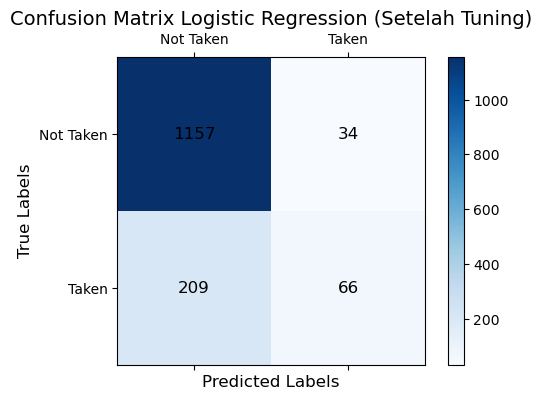

Dari model Logistic Regression (Setelah Tuning) didapatkan bahwa:
- Jumlah TP (True Positive) = 66
- Jumlah TN (True Negative) = 1157
- Jumlah FP (False Positive) = 34
- Jumlah FN (False Negative) = 209
Logistic Regression setelah tuning hyperparameters:
Best penalty: l2
Best C: 2.976351441631316
Accuracy: 0.8342
Precision: 0.66
Recall: 0.24
F1 Score: 0.352
AUC (Test): 0.775
AUC (Train): 0.7962


In [98]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
lr_model = LogisticRegression(random_state=42)
lr_model_tuned = RandomizedSearchCV(lr_model, list_hyperparameters[0], cv=10, scoring='f1', random_state=42)

lr_model_tuned.fit(X_train, y_train)

plot_confusion_matrix(lr_model_tuned, X_test, y_test, title='Logistic Regression (Setelah Tuning)')

print('Logistic Regression setelah tuning hyperparameters:')
show_best_hyperparameter(lr_model_tuned, list_hyperparameters[0])
eval_after_hyperparameter_tuning(lr_model_tuned, X_train, y_train, X_test, y_test)

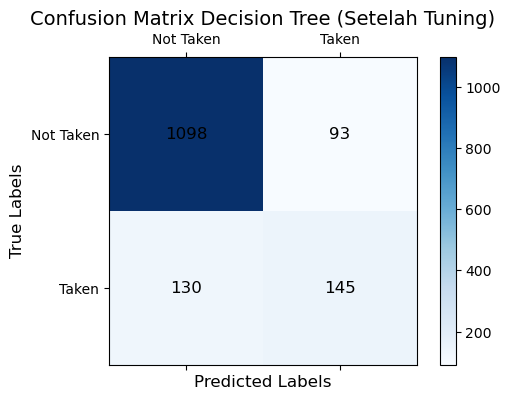

Dari model Decision Tree (Setelah Tuning) didapatkan bahwa:
- Jumlah TP (True Positive) = 145
- Jumlah TN (True Negative) = 1098
- Jumlah FP (False Positive) = 93
- Jumlah FN (False Negative) = 130
Decision Tree setelah tuning hyperparameters:
Best max_depth: 80
Best min_samples_split: 6
Best min_samples_leaf: 1
Best max_features: sqrt
Accuracy: 0.8479
Precision: 0.6092
Recall: 0.5273
F1 Score: 0.5653
AUC (Test): 0.7916
AUC (Train): 0.987


In [99]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model_tuned = RandomizedSearchCV(dt_model, list_hyperparameters[1], cv=10, scoring='f1', random_state=42)

dt_model_tuned.fit(X_train, y_train)

plot_confusion_matrix(dt_model_tuned, X_test, y_test, title='Decision Tree (Setelah Tuning)')

print('Decision Tree setelah tuning hyperparameters:')
show_best_hyperparameter(dt_model_tuned, list_hyperparameters[1])
eval_after_hyperparameter_tuning(dt_model_tuned, X_train, y_train, X_test, y_test)

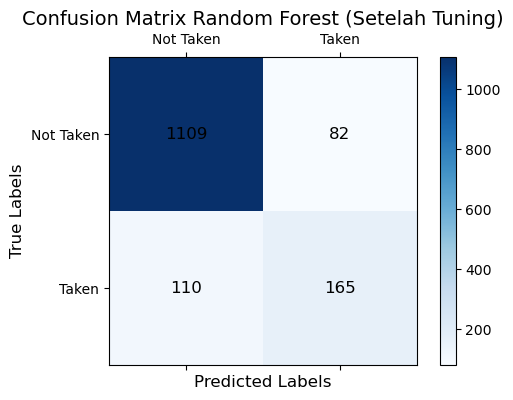

Dari model Random Forest (Setelah Tuning) didapatkan bahwa:
- Jumlah TP (True Positive) = 165
- Jumlah TN (True Negative) = 1109
- Jumlah FP (False Positive) = 82
- Jumlah FN (False Negative) = 110
Random Forest setelah tuning hyperparameters:
Best n_estimators: 941
Best max_features: log2
Best max_depth: 80
Best criterion: gini
Best min_samples_split: 8
Best min_samples_leaf: 1
Best class_weight: balanced_subsample
Best oob_score: True
Accuracy: 0.869
Precision: 0.668
Recall: 0.6
F1 Score: 0.6322
AUC (Test): 0.8692
AUC (Train): 0.9951


In [100]:
rf_model = RandomForestClassifier(random_state=42)
rf_model_tuned = RandomizedSearchCV(rf_model, list_hyperparameters[2], cv=5, scoring='f1', random_state=42)

rf_model_tuned.fit(X_train, y_train)

plot_confusion_matrix(rf_model_tuned, X_test, y_test, title='Random Forest (Setelah Tuning)')

print('Random Forest setelah tuning hyperparameters:')
show_best_hyperparameter(rf_model_tuned, list_hyperparameters[2])
eval_after_hyperparameter_tuning(rf_model_tuned, X_train, y_train, X_test, y_test)

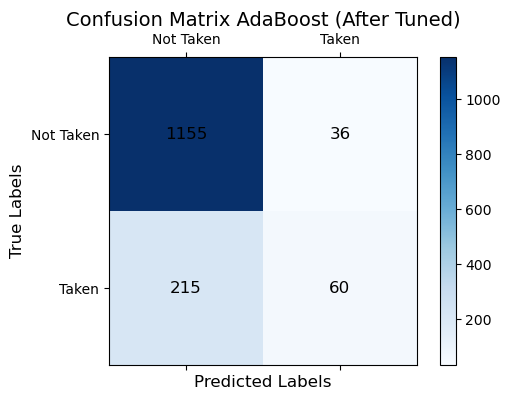

Dari model AdaBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 60
- Jumlah TN (True Negative) = 1155
- Jumlah FP (False Positive) = 36
- Jumlah FN (False Negative) = 215
AdaBoost setelah tuning hyperparameters:
Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R
Accuracy: 0.8288
Precision: 0.625
Recall: 0.2182
F1 Score: 0.3235
AUC (Test): 0.782
AUC (Train): 0.8183


In [101]:
adaboost_model = AdaBoostClassifier(random_state=42)
adbm_tuned = RandomizedSearchCV(adaboost_model, list_hyperparameters[3], cv=10, scoring='f1', random_state=42)
adbm_tuned.fit(X_train, y_train)

plot_confusion_matrix(adbm_tuned, X_test, y_test, title='AdaBoost (After Tuned)')

print('AdaBoost setelah tuning hyperparameters:')
show_best_hyperparameter(adbm_tuned, list_hyperparameters[3])
eval_after_hyperparameter_tuning(adbm_tuned, X_train, y_train, X_test, y_test)

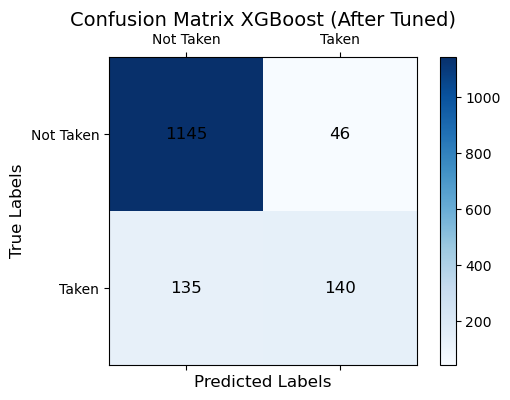

Dari model XGBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 140
- Jumlah TN (True Negative) = 1145
- Jumlah FP (False Positive) = 46
- Jumlah FN (False Negative) = 135
XGBoost setelah tuning hyperparameters:
Best max_depth: 50
Best min_child_weight: 2
Best gamma: 0.1
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best learning_rate: 0.5252525252525253
Best reg_lambda: 0.8
Best reg_alpha: 0.8
Accuracy: 0.8765
Precision: 0.7527
Recall: 0.5091
F1 Score: 0.6074
AUC (Test): 0.8671
AUC (Train): 0.9946


In [102]:
xgb_model = XGBClassifier(random_state=42)
xgb_model_tuned = RandomizedSearchCV(xgb_model, list_hyperparameters[4], cv=10, scoring='f1', random_state=42)
xgb_model_tuned.fit(X_train, y_train)

plot_confusion_matrix(xgb_model_tuned, X_test, y_test, title='XGBoost (After Tuned)')

print('XGBoost setelah tuning hyperparameters:')
show_best_hyperparameter(xgb_model_tuned, list_hyperparameters[4])
eval_after_hyperparameter_tuning(xgb_model_tuned, X_train, y_train, X_test, y_test)

In [103]:
model_tuning = [lr_model_tuned, dt_model_tuned, rf_model_tuned, adbm_tuned, xgb_model_tuned]
score_all_classification(model_tuning, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Logistic Regression,0.8342,0.6600,0.2400,0.3520,0.7750,0.7962
1,Decision Tree,0.8479,0.6092,0.5273,0.5653,0.7916,0.9870
2,Random Forest,0.8690,0.6680,0.6000,0.6322,0.8692,0.9951
3,AdaBoost,0.8288,0.6250,0.2182,0.3235,0.7820,0.8183
4,XGBoost,0.8765,0.7527,0.5091,0.6074,0.8671,0.9946
